In [ ]:
# install Hangul font

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_DI = pd.read_csv("/content/train_DI.csv")
train_IVF = pd.read_csv("/content/train_IVF.csv")
test_DI= pd.read_csv("/content/test_DI.csv")
test_IVF = pd.read_csv("/content/test_IVF.csv")


In [ ]:
categorical_columns = [
    "ÏãúÏà† ÏãúÍ∏∞ ÏΩîÎìú",
    "ÏãúÏà† ÎãπÏãú ÎÇòÏù¥",
    "ÏãúÏà† Ïú†Ìòï",
    "ÌäπÏ†ï ÏãúÏà† Ïú†Ìòï",
    "Î∞∞ÎûÄ ÏûêÍ∑π Ïó¨Î∂Ä",
    "Î∞∞ÎûÄ Ïú†ÎèÑ Ïú†Ìòï",
    "Îã®Ïùº Î∞∞ÏïÑ Ïù¥Ïãù Ïó¨Î∂Ä",
    "Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ Í≤ÄÏÇ¨ ÏÇ¨Ïö© Ïó¨Î∂Ä",
    "Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ ÏßÑÎã® ÏÇ¨Ïö© Ïó¨Î∂Ä",
    "Î∞∞ÏïÑ ÏÉùÏÑ± Ï£ºÏöî Ïù¥Ïú†",
    "Ï¥ù ÏãúÏà† ÌöüÏàò",
    "ÌÅ¥Î¶¨Îãâ ÎÇ¥ Ï¥ù ÏãúÏà† ÌöüÏàò",
    "IVF ÏãúÏà† ÌöüÏàò",
    "DI ÏãúÏà† ÌöüÏàò",
    "Ï¥ù ÏûÑÏã† ÌöüÏàò",
    "IVF ÏûÑÏã† ÌöüÏàò",
    "DI ÏûÑÏã† ÌöüÏàò",
    "Ï¥ù Ï∂úÏÇ∞ ÌöüÏàò",
    "IVF Ï∂úÏÇ∞ ÌöüÏàò",
    "DI Ï∂úÏÇ∞ ÌöüÏàò"

]

numeric_columns = [
    "ÏûÑÏã† ÏãúÎèÑ ÎòêÎäî ÎßàÏßÄÎßâ ÏûÑÏã† Í≤ΩÍ≥º Ïó∞Ïàò"

]

TARGET = 'ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä'

In [ ]:
# ÏÑ†ÌÉùÌï† Ïª¨Îüº ÏÑ§Ï†ï
used_columns = categorical_columns + numeric_columns

# Í∞Å Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú ÏÑ†ÌÉùÌïú Ïª¨ÎüºÎßå Ï∂îÏ∂ú
train_DI_selected = train_DI[used_columns]
train_IVF_selected = train_IVF[used_columns]
test_DI_selected = test_DI[used_columns]
test_IVF_selected = test_IVF[used_columns]


In [ ]:
train_DI_selected

ÏãúÏà† ÏãúÍ∏∞ ÏΩîÎìú ÏãúÏà† ÎãπÏãú ÎÇòÏù¥ ÏãúÏà† Ïú†Ìòï ÌäπÏ†ï ÏãúÏà† Ïú†Ìòï  Î∞∞ÎûÄ ÏûêÍ∑π Ïó¨Î∂Ä Î∞∞ÎûÄ Ïú†ÎèÑ Ïú†Ìòï  Îã®Ïùº Î∞∞ÏïÑ Ïù¥Ïãù Ïó¨Î∂Ä  \
0      TRXQMD  Îßå38-39ÏÑ∏    DI      IUI         0   Ïïå Ïàò ÏóÜÏùå          NaN   
1      TRDQAZ  Îßå18-34ÏÑ∏    DI      IUI         1   Ïïå Ïàò ÏóÜÏùå          NaN   
2      TRJXFG  Îßå35-37ÏÑ∏    DI      IUI         1   Ïïå Ïàò ÏóÜÏùå          NaN   
3      TRXQMD  Îßå38-39ÏÑ∏    DI      IUI         1   Ïïå Ïàò ÏóÜÏùå          NaN   
4      TRCMWS  Îßå40-42ÏÑ∏    DI      IUI         0   Ïïå Ïàò ÏóÜÏùå          NaN   
...       ...      ...   ...      ...       ...      ...          ...   
6286   TRZKPL  Îßå45-50ÏÑ∏    DI      IUI         1   Ïïå Ïàò ÏóÜÏùå          NaN   
6287   TRYBLT  Îßå18-34ÏÑ∏    DI      IUI         1   Ïïå Ïàò ÏóÜÏùå          NaN   
6288   TRYBLT  Îßå40-42ÏÑ∏    DI      IUI         1   Ïïå Ïàò ÏóÜÏùå          NaN   
6289   TRCMWS  Îßå40-42ÏÑ∏    DI      IUI         0   Ïïå Ïàò ÏóÜÏùå          NaN   
6290   TRDQAZ  Îßå40-42ÏÑ∏    DI      IUI         1   Ïïå Ïàò ÏóÜÏùå          NaN   

      Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ Í≤ÄÏÇ¨ ÏÇ¨Ïö© Ïó¨Î∂Ä  Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ ÏßÑÎã® ÏÇ¨Ïö© Ïó¨Î∂Ä  Î∞∞ÏïÑ ÏÉùÏÑ± Ï£ºÏöî Ïù¥Ïú†  ... ÌÅ¥Î¶¨Îãâ ÎÇ¥ Ï¥ù ÏãúÏà† ÌöüÏàò  \
0                  NaN               NaN          NaN  ...            3Ìöå   
1                  NaN               NaN          NaN  ...            3Ìöå   
2                  NaN               NaN          NaN  ...            3Ìöå   
3                  NaN               NaN          NaN  ...            3Ìöå   
4                  NaN               NaN          NaN  ...            1Ìöå   
...                ...               ...          ...  ...           ...   
6286               NaN               NaN          NaN  ...         6Ìöå Ïù¥ÏÉÅ   
6287               NaN               NaN          NaN  ...            2Ìöå   
6288               NaN               NaN          NaN  ...            2Ìöå   
6289               NaN               NaN          NaN  ...            5Ìöå   
6290               NaN               NaN          NaN  ...         6Ìöå Ïù¥ÏÉÅ   

     IVF ÏãúÏà† ÌöüÏàò DI ÏãúÏà† ÌöüÏàò Ï¥ù ÏûÑÏã† ÌöüÏàò IVF ÏûÑÏã† ÌöüÏàò DI ÏûÑÏã† ÌöüÏàò Ï¥ù Ï∂úÏÇ∞ ÌöüÏàò IVF Ï∂úÏÇ∞ ÌöüÏàò DI Ï∂úÏÇ∞ ÌöüÏàò  \
0           5Ìöå       5Ìöå      0Ìöå        0Ìöå       0Ìöå      0Ìöå        0Ìöå       0Ìöå   
1           0Ìöå       3Ìöå      1Ìöå        0Ìöå       1Ìöå      1Ìöå        0Ìöå       1Ìöå   
2           0Ìöå       3Ìöå      0Ìöå        0Ìöå       0Ìöå      0Ìöå        0Ìöå       0Ìöå   
3           0Ìöå       3Ìöå      0Ìöå        0Ìöå       0Ìöå      0Ìöå        0Ìöå       0Ìöå   
4           0Ìöå       1Ìöå      0Ìöå        0Ìöå       0Ìöå      0Ìöå        0Ìöå       0Ìöå   
...        ...      ...     ...       ...      ...     ...       ...      ...   
6286        0Ìöå    6Ìöå Ïù¥ÏÉÅ      1Ìöå        0Ìöå       1Ìöå      1Ìöå        0Ìöå       1Ìöå   
6287        0Ìöå       2Ìöå      0Ìöå        0Ìöå       0Ìöå      0Ìöå        0Ìöå       0Ìöå   
6288        0Ìöå       2Ìöå      1Ìöå        0Ìöå       1Ìöå      0Ìöå        0Ìöå       0Ìöå   
6289        0Ìöå       5Ìöå      1Ìöå        0Ìöå       1Ìöå      1Ìöå        0Ìöå       1Ìöå   
6290     6Ìöå Ïù¥ÏÉÅ       0Ìöå      1Ìöå        1Ìöå       0Ìöå      1Ìöå        1Ìöå       0Ìöå   

     ÏûÑÏã† ÏãúÎèÑ ÎòêÎäî ÎßàÏßÄÎßâ ÏûÑÏã† Í≤ΩÍ≥º Ïó∞Ïàò  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  
...                    ...  
6286                   NaN  
6287                   NaN  
6288                   NaN  
6289                   NaN  
6290                   NaN  

[6291 rows x 21 columns]

In [ ]:
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
train_IVF_path = "/content/train_IVF.csv"  # ÏóÖÎ°úÎìúÌïú ÌååÏùº Í≤ΩÎ°ú
train_IVF = pd.read_csv(train_IVF_path, encoding='utf-8')

# Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ ÌôïÏù∏ (Ìñâ, Ïó¥ Í∞úÏàò)
print("üìå Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ (Ìñâ, Ïó¥):", train_IVF.shape)

# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î∞è Í∏∞Î≥∏ Ï†ïÎ≥¥ ÌôïÏù∏
print("\nüìå Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î∞è Í∏∞Î≥∏ Ï†ïÎ≥¥:")
print(train_IVF.info())

# ÏÉÅÏúÑ 5Í∞ú Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print("\nüìå ÏÉÅÏúÑ 5Í∞ú Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞:")
print(train_IVF.head())

# Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ ÌÜµÍ≥Ñ Ï†ïÎ≥¥ ÌôïÏù∏
print("\nüìå ÏàòÏπòÌòï Î≥ÄÏàò Í∏∞Ï¥à ÌÜµÍ≥ÑÎüâ:")
print(train_IVF.describe())


üìå Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ (Ìñâ, Ïó¥): (250060, 69)

üìå Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î∞è Í∏∞Î≥∏ Ï†ïÎ≥¥:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250060 entries, 0 to 250059
Data columns (total 69 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     250060 non-null  object 
 1   ÏãúÏà† ÏãúÍ∏∞ ÏΩîÎìú               250060 non-null  object 
 2   ÏãúÏà† ÎãπÏãú ÎÇòÏù¥               250060 non-null  object 
 3   ÏûÑÏã† ÏãúÎèÑ ÎòêÎäî ÎßàÏßÄÎßâ ÏûÑÏã† Í≤ΩÍ≥º Ïó∞Ïàò  9067 non-null    float64
 4   ÏãúÏà† Ïú†Ìòï                  250060 non-null  object 
 5   ÌäπÏ†ï ÏãúÏà† Ïú†Ìòï               250058 non-null  object 
 6   Î∞∞ÎûÄ ÏûêÍ∑π Ïó¨Î∂Ä               250060 non-null  int64  
 7   Î∞∞ÎûÄ Ïú†ÎèÑ Ïú†Ìòï               250060 non-null  object 
 8   Îã®Ïùº Î∞∞ÏïÑ Ïù¥Ïãù Ïó¨Î∂Ä            250060 non-null  float64
 9   Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ Í≤ÄÏÇ¨ ÏÇ¨Ïö© Ïó¨Î∂Ä       2718 non-null    float64
 10  Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ ÏßÑÎã

Í≤∞Ï∏°Ïπò ÌôïÏù∏


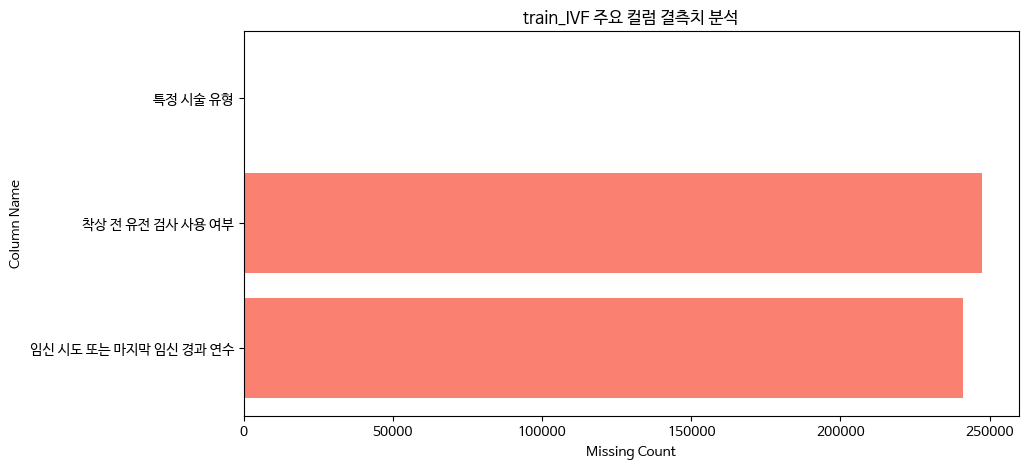

Í≤∞Ï∏°Ïπò Î∂ÑÏÑù Í≤∞Í≥º:
                  Column  Missing_Count
0               ÌäπÏ†ï ÏãúÏà† Ïú†Ìòï              2
1       Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ Í≤ÄÏÇ¨ ÏÇ¨Ïö© Ïó¨Î∂Ä         247342
2  ÏûÑÏã† ÏãúÎèÑ ÎòêÎäî ÎßàÏßÄÎßâ ÏûÑÏã† Í≤ΩÍ≥º Ïó∞Ïàò         240993


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
train_IVF_path = "/content/train_IVF.csv"  # ÏóÖÎ°úÎìúÌïú ÌååÏùº Í≤ΩÎ°ú
train_IVF = pd.read_csv(train_IVF_path, encoding='utf-8')

# Î∂ÑÏÑù ÎåÄÏÉÅ Ïª¨Îüº
categorical_columns = [
    "ÏãúÏà† ÏãúÍ∏∞ ÏΩîÎìú", "ÏãúÏà† ÎãπÏãú ÎÇòÏù¥", "ÏãúÏà† Ïú†Ìòï", "ÌäπÏ†ï ÏãúÏà† Ïú†Ìòï", "Î∞∞ÎûÄ ÏûêÍ∑π Ïó¨Î∂Ä",
    "Î∞∞ÎûÄ Ïú†ÎèÑ Ïú†Ìòï", "Îã®Ïùº Î∞∞ÏïÑ Ïù¥Ïãù Ïó¨Î∂Ä", "Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ Í≤ÄÏÇ¨ ÏÇ¨Ïö© Ïó¨Î∂Ä", "Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ ÏßÑÎã® ÏÇ¨Ïö© Ïó¨Î∂Ä",
    "Î∞∞ÏïÑ ÏÉùÏÑ± Ï£ºÏöî Ïù¥Ïú†", "Ï¥ù ÏãúÏà† ÌöüÏàò", "ÌÅ¥Î¶¨Îãâ ÎÇ¥ Ï¥ù ÏãúÏà† ÌöüÏàò", "IVF ÏãúÏà† ÌöüÏàò", "DI ÏãúÏà† ÌöüÏàò",
    "Ï¥ù ÏûÑÏã† ÌöüÏàò", "IVF ÏûÑÏã† ÌöüÏàò", "DI ÏûÑÏã† ÌöüÏàò", "Ï¥ù Ï∂úÏÇ∞ ÌöüÏàò", "IVF Ï∂úÏÇ∞ ÌöüÏàò", "DI Ï∂úÏÇ∞ ÌöüÏàò"
]

numeric_columns = ["ÏûÑÏã† ÏãúÎèÑ ÎòêÎäî ÎßàÏßÄÎßâ ÏûÑÏã† Í≤ΩÍ≥º Ïó∞Ïàò"]
target_column = "ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä"

# ÎåÄÏÉÅ Ïª¨ÎüºÎßå ÏÑ†ÌÉù
selected_columns = categorical_columns + numeric_columns + [target_column]
train_IVF_selected = train_IVF[selected_columns]

# Í≤∞Ï∏°Ïπò Í∞úÏàò Í≥ÑÏÇ∞
missing_values = train_IVF_selected.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values_df = pd.DataFrame({'Column': missing_values.index, 'Missing_Count': missing_values.values})

# Í≤∞Ï∏°Ïπò ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
plt.barh(missing_values_df["Column"], missing_values_df["Missing_Count"], color="salmon")
plt.xlabel("Missing Count")
plt.ylabel("Column Name")
plt.title("train_IVF Ï£ºÏöî Ïª¨Îüº Í≤∞Ï∏°Ïπò Î∂ÑÏÑù")
plt.gca().invert_yaxis()
plt.show()

# Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ Ï∂úÎ†•
print("Í≤∞Ï∏°Ïπò Î∂ÑÏÑù Í≤∞Í≥º:")
print(missing_values_df)


In [ ]:
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
train_IVF_path = "/content/train_IVF.csv"  # ÏóÖÎ°úÎìúÌïú ÌååÏùº Í≤ΩÎ°ú
train_IVF = pd.read_csv(train_IVF_path, encoding='utf-8')

# Î∂ÑÏÑù ÎåÄÏÉÅ Ïª¨Îüº
categorical_columns = [
    "ÏãúÏà† ÏãúÍ∏∞ ÏΩîÎìú", "ÏãúÏà† ÎãπÏãú ÎÇòÏù¥", "ÏãúÏà† Ïú†Ìòï", "ÌäπÏ†ï ÏãúÏà† Ïú†Ìòï", "Î∞∞ÎûÄ ÏûêÍ∑π Ïó¨Î∂Ä",
    "Î∞∞ÎûÄ Ïú†ÎèÑ Ïú†Ìòï", "Îã®Ïùº Î∞∞ÏïÑ Ïù¥Ïãù Ïó¨Î∂Ä", "Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ Í≤ÄÏÇ¨ ÏÇ¨Ïö© Ïó¨Î∂Ä", "Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ ÏßÑÎã® ÏÇ¨Ïö© Ïó¨Î∂Ä",
    "Î∞∞ÏïÑ ÏÉùÏÑ± Ï£ºÏöî Ïù¥Ïú†", "Ï¥ù ÏãúÏà† ÌöüÏàò", "ÌÅ¥Î¶¨Îãâ ÎÇ¥ Ï¥ù ÏãúÏà† ÌöüÏàò", "IVF ÏãúÏà† ÌöüÏàò", "DI ÏãúÏà† ÌöüÏàò",
    "Ï¥ù ÏûÑÏã† ÌöüÏàò", "IVF ÏûÑÏã† ÌöüÏàò", "DI ÏûÑÏã† ÌöüÏàò", "Ï¥ù Ï∂úÏÇ∞ ÌöüÏàò", "IVF Ï∂úÏÇ∞ ÌöüÏàò", "DI Ï∂úÏÇ∞ ÌöüÏàò"
]

numeric_columns = ["ÏûÑÏã† ÏãúÎèÑ ÎòêÎäî ÎßàÏßÄÎßâ ÏûÑÏã† Í≤ΩÍ≥º Ïó∞Ïàò"]
target_column = "ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä"

# ÎåÄÏÉÅ Ïª¨ÎüºÎßå ÏÑ†ÌÉù
selected_columns = categorical_columns + numeric_columns + [target_column]
train_IVF_selected = train_IVF[selected_columns]

# Í≤∞Ï∏°Ïπò Í∞úÏàò Í≥ÑÏÇ∞
missing_values = train_IVF_selected.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Í≤∞Ï∏°Ïπò Î∂ÑÏÑù Í≤∞Í≥º Ï∂úÎ†•
if missing_values.empty:
    print("Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÏäµÎãàÎã§.")
else:
    print("\nÍ≤∞Ï∏°Ïπò Î∂ÑÏÑù Í≤∞Í≥º:")
    print(missing_values.to_string(index=True))



Í≤∞Ï∏°Ïπò Î∂ÑÏÑù Í≤∞Í≥º:
ÌäπÏ†ï ÏãúÏà† Ïú†Ìòï                      2
Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ Í≤ÄÏÇ¨ ÏÇ¨Ïö© Ïó¨Î∂Ä         247342
ÏûÑÏã† ÏãúÎèÑ ÎòêÎäî ÎßàÏßÄÎßâ ÏûÑÏã† Í≤ΩÍ≥º Ïó∞Ïàò    240993


In [ ]:
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
train_IVF_path = "/content/train_DI.csv"  # ÏóÖÎ°úÎìúÌïú ÌååÏùº Í≤ΩÎ°ú
train_IVF = pd.read_csv(train_IVF_path, encoding='utf-8')

# Î∂ÑÏÑù ÎåÄÏÉÅ Ïª¨Îüº
categorical_columns = [
    "ÏãúÏà† ÏãúÍ∏∞ ÏΩîÎìú", "ÏãúÏà† ÎãπÏãú ÎÇòÏù¥", "ÏãúÏà† Ïú†Ìòï", "ÌäπÏ†ï ÏãúÏà† Ïú†Ìòï", "Î∞∞ÎûÄ ÏûêÍ∑π Ïó¨Î∂Ä",
    "Î∞∞ÎûÄ Ïú†ÎèÑ Ïú†Ìòï", "Îã®Ïùº Î∞∞ÏïÑ Ïù¥Ïãù Ïó¨Î∂Ä", "Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ Í≤ÄÏÇ¨ ÏÇ¨Ïö© Ïó¨Î∂Ä", "Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ ÏßÑÎã® ÏÇ¨Ïö© Ïó¨Î∂Ä",
    "Î∞∞ÏïÑ ÏÉùÏÑ± Ï£ºÏöî Ïù¥Ïú†", "Ï¥ù ÏãúÏà† ÌöüÏàò", "ÌÅ¥Î¶¨Îãâ ÎÇ¥ Ï¥ù ÏãúÏà† ÌöüÏàò", "IVF ÏãúÏà† ÌöüÏàò", "DI ÏãúÏà† ÌöüÏàò",
    "Ï¥ù ÏûÑÏã† ÌöüÏàò", "IVF ÏûÑÏã† ÌöüÏàò", "DI ÏûÑÏã† ÌöüÏàò", "Ï¥ù Ï∂úÏÇ∞ ÌöüÏàò", "IVF Ï∂úÏÇ∞ ÌöüÏàò", "DI Ï∂úÏÇ∞ ÌöüÏàò"
]

numeric_columns = ["ÏûÑÏã† ÏãúÎèÑ ÎòêÎäî ÎßàÏßÄÎßâ ÏûÑÏã† Í≤ΩÍ≥º Ïó∞Ïàò"]
target_column = "ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä"

# ÎåÄÏÉÅ Ïª¨ÎüºÎßå ÏÑ†ÌÉù
selected_columns = categorical_columns + numeric_columns + [target_column]
train_IVF_selected = train_IVF[selected_columns]

# Í≤∞Ï∏°Ïπò Í∞úÏàò Í≥ÑÏÇ∞
missing_values = train_IVF_selected.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Í≤∞Ï∏°Ïπò Î∂ÑÏÑù Í≤∞Í≥º Ï∂úÎ†•
if missing_values.empty:
    print("Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÏäµÎãàÎã§.")
else:
    print("\nÍ≤∞Ï∏°Ïπò Î∂ÑÏÑù Í≤∞Í≥º:")
    print(missing_values.to_string(index=True))



Í≤∞Ï∏°Ïπò Î∂ÑÏÑù Í≤∞Í≥º:
Îã®Ïùº Î∞∞ÏïÑ Ïù¥Ïãù Ïó¨Î∂Ä              6291
Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ Í≤ÄÏÇ¨ ÏÇ¨Ïö© Ïó¨Î∂Ä         6291
Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ ÏßÑÎã® ÏÇ¨Ïö© Ïó¨Î∂Ä         6291
Î∞∞ÏïÑ ÏÉùÏÑ± Ï£ºÏöî Ïù¥Ïú†              6291
ÏûÑÏã† ÏãúÎèÑ ÎòêÎäî ÎßàÏßÄÎßâ ÏûÑÏã† Í≤ΩÍ≥º Ïó∞Ïàò    5988


Í∏∞Î≥∏ ÌÜµÍ≥ÑÎûë Î∂ÑÏÑù

In [ ]:
import pandas as pd

# ÏàòÏπòÌòï Î≥ÄÏàò Í∏∞Î≥∏ ÌÜµÍ≥ÑÎüâ ÌôïÏù∏
print("\nüìå ÏàòÏπòÌòï Î≥ÄÏàò Í∏∞Ï¥à ÌÜµÍ≥ÑÎüâ:")
print(train_IVF_selected.describe())

# Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò Í∞í Î∂ÑÌè¨ ÌôïÏù∏
print("\nüìå Î≤îÏ£ºÌòï Î≥ÄÏàòÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨:")
for col in categorical_columns:
    print(f"\n‚ñ∂ {col} Í∞í Î∂ÑÌè¨:")
    print(train_IVF_selected[col].value_counts())



üìå ÏàòÏπòÌòï Î≥ÄÏàò Í∏∞Ï¥à ÌÜµÍ≥ÑÎüâ:
          Î∞∞ÎûÄ ÏûêÍ∑π Ïó¨Î∂Ä  Îã®Ïùº Î∞∞ÏïÑ Ïù¥Ïãù Ïó¨Î∂Ä  Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ Í≤ÄÏÇ¨ ÏÇ¨Ïö© Ïó¨Î∂Ä  Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ ÏßÑÎã® ÏÇ¨Ïö© Ïó¨Î∂Ä  \
count  6291.000000          0.0               0.0               0.0   
mean      0.522333          NaN               NaN               NaN   
std       0.499541          NaN               NaN               NaN   
min       0.000000          NaN               NaN               NaN   
25%       0.000000          NaN               NaN               NaN   
50%       1.000000          NaN               NaN               NaN   
75%       1.000000          NaN               NaN               NaN   
max       1.000000          NaN               NaN               NaN   

       Î∞∞ÏïÑ ÏÉùÏÑ± Ï£ºÏöî Ïù¥Ïú†  ÏûÑÏã† ÏãúÎèÑ ÎòêÎäî ÎßàÏßÄÎßâ ÏûÑÏã† Í≤ΩÍ≥º Ïó∞Ïàò     ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä  
count          0.0             303.000000  6291.000000  
mean           NaN               9.227723     0.128914  
std            NaN

### train_DI Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî ###


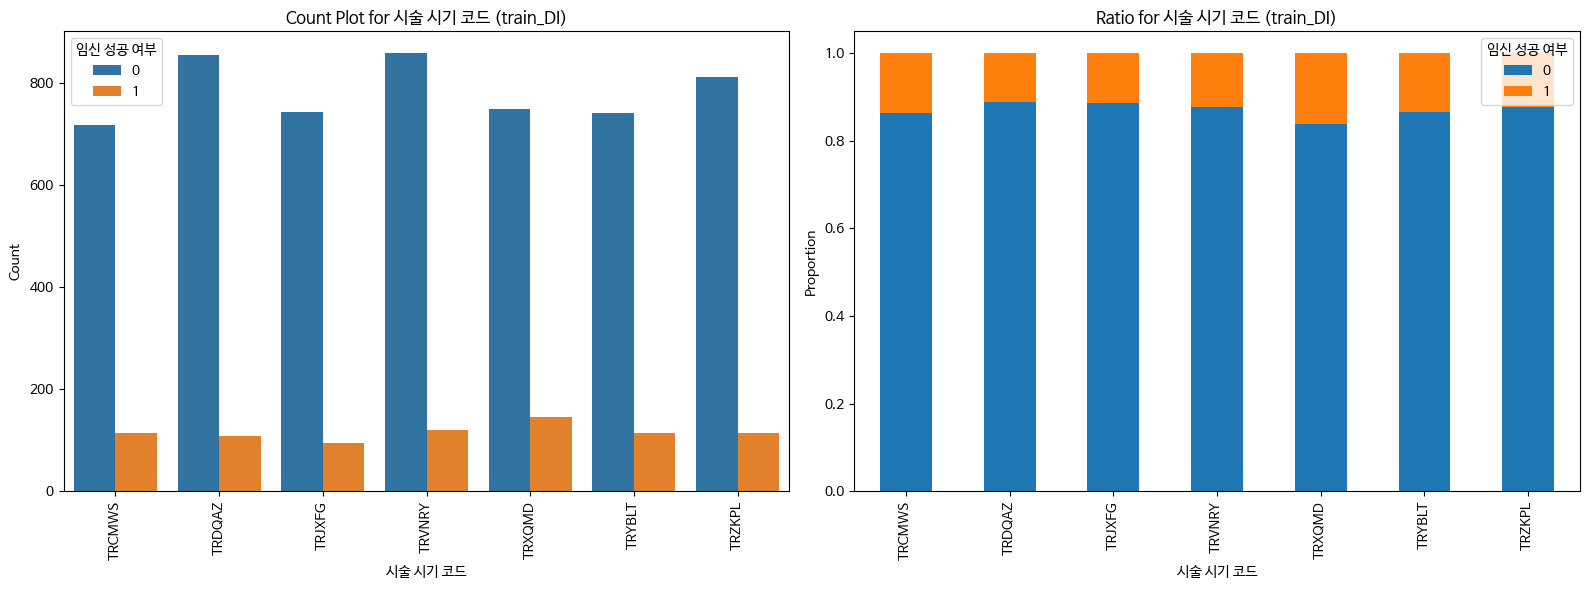

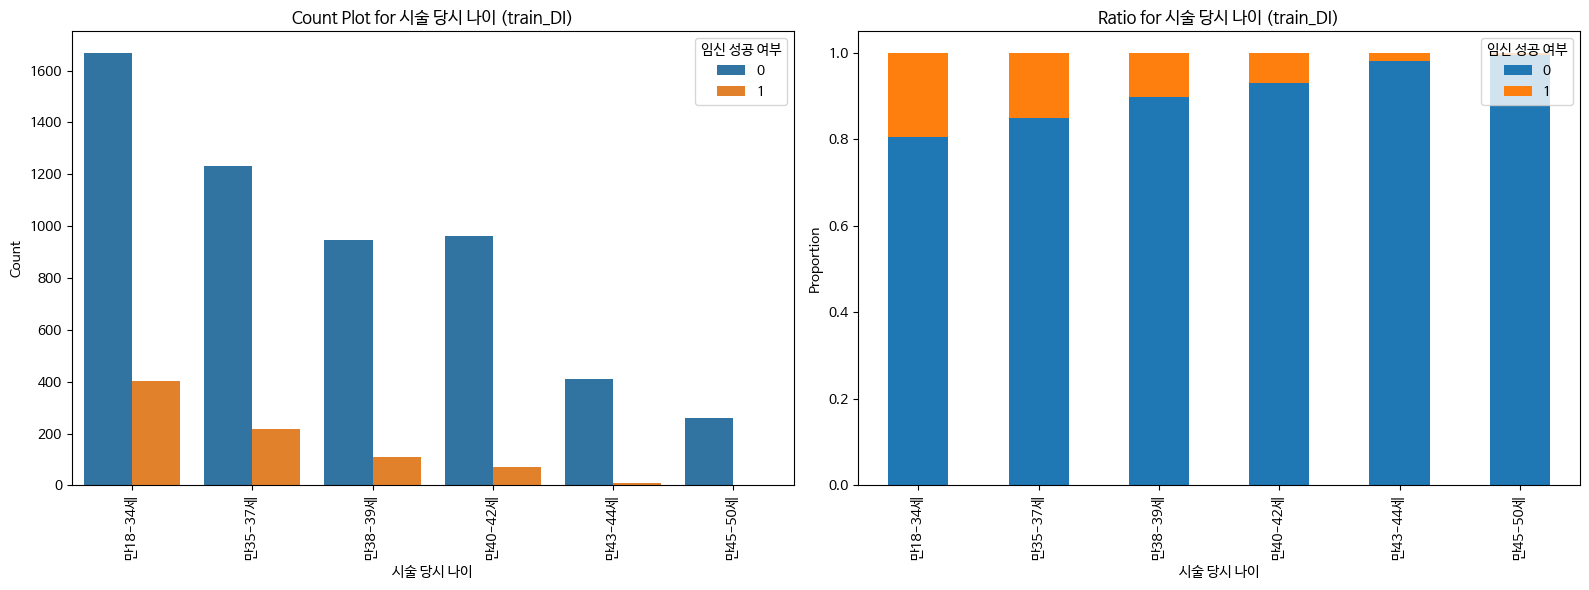

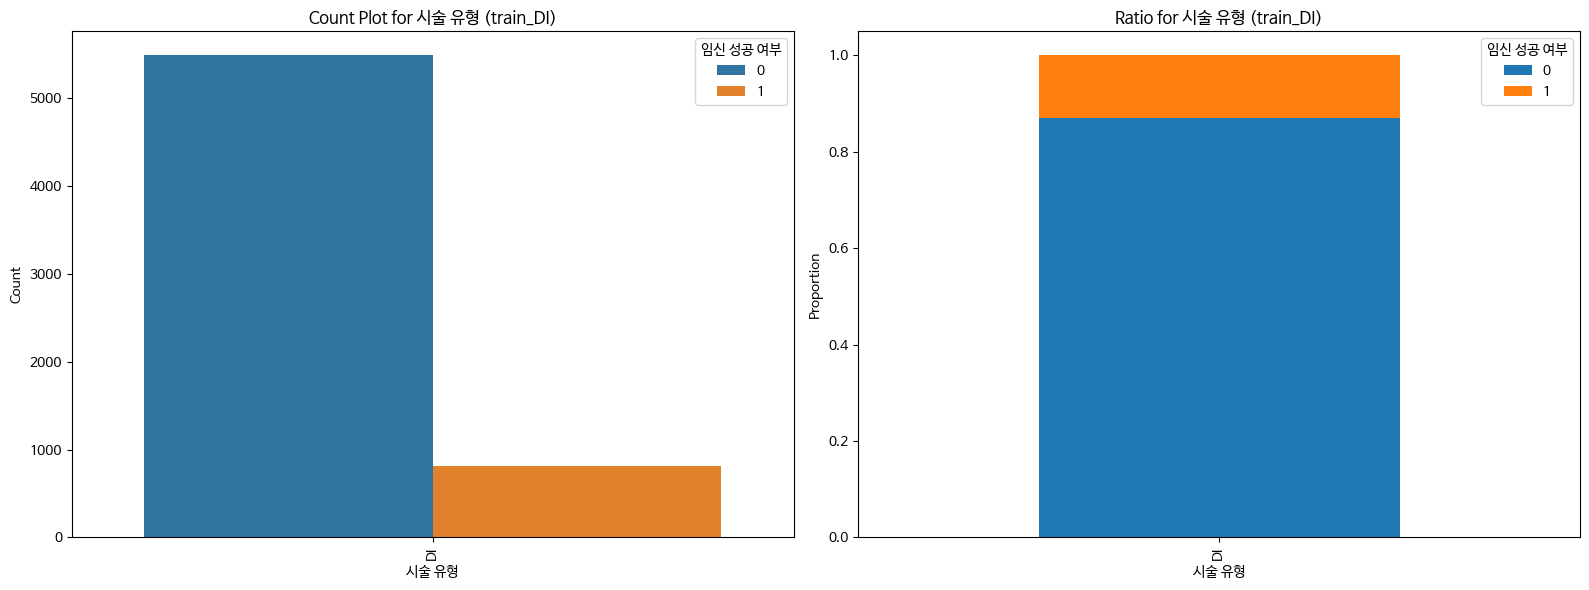

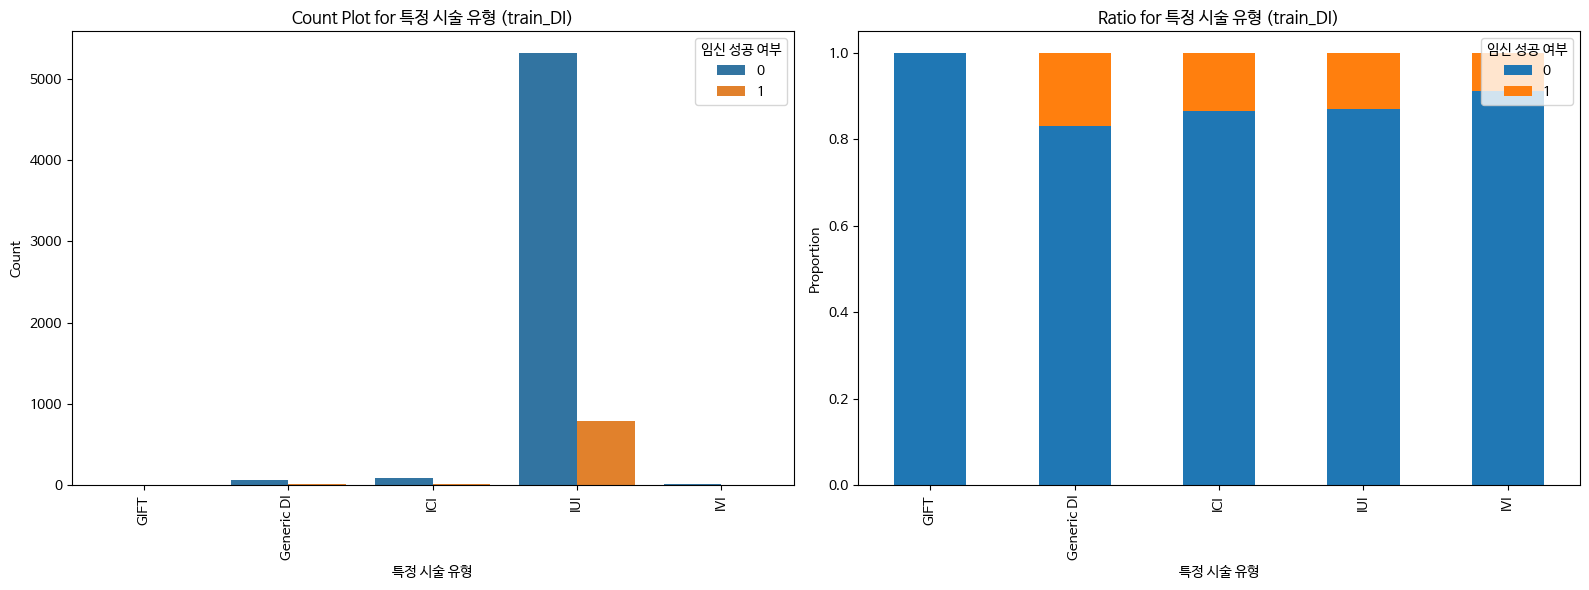

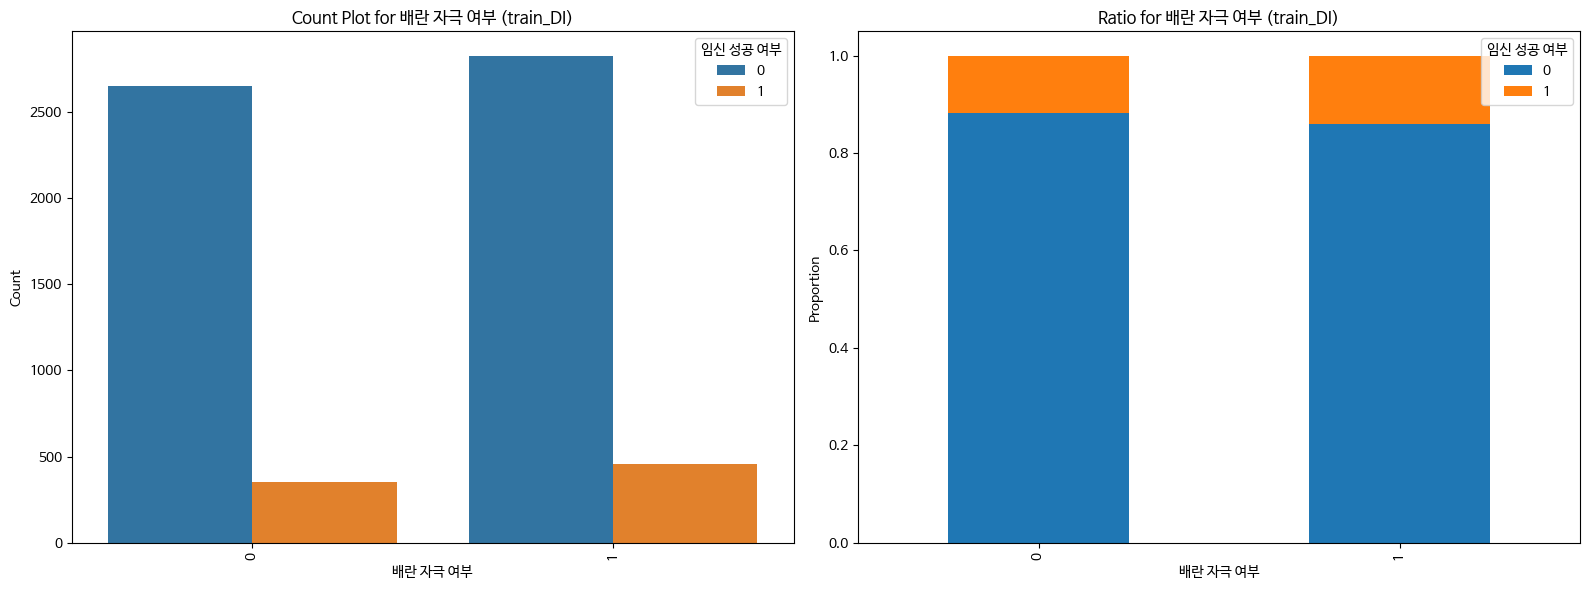

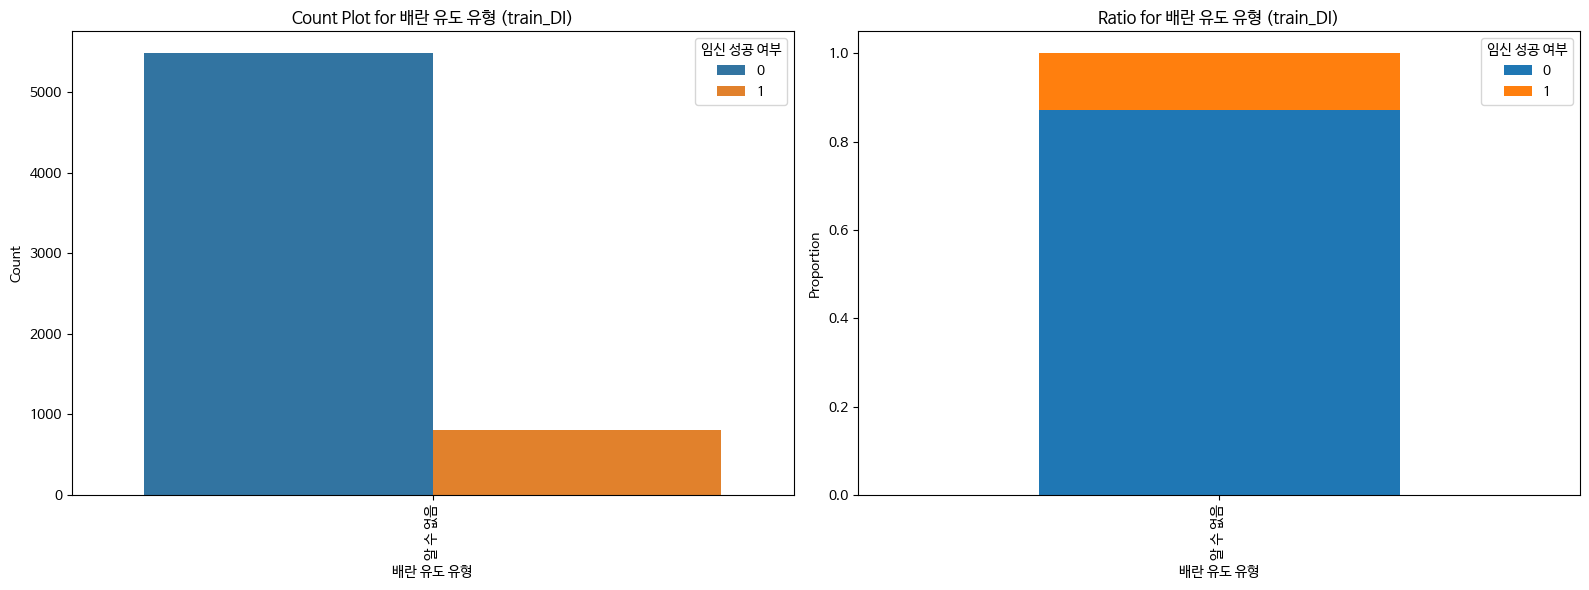

Îã®Ïùº Î∞∞ÏïÑ Ïù¥Ïãù Ïó¨Î∂Ä Ïª¨ÎüºÏóêÏÑú ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä Í∞íÏù¥ ÌïòÎÇòÎßå Ï°¥Ïû¨ÌïòÏó¨ ÏãúÍ∞ÅÌôîÎ•º Í±¥ÎÑàÎúÅÎãàÎã§.
Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ Í≤ÄÏÇ¨ ÏÇ¨Ïö© Ïó¨Î∂Ä Ïª¨ÎüºÏóêÏÑú ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä Í∞íÏù¥ ÌïòÎÇòÎßå Ï°¥Ïû¨ÌïòÏó¨ ÏãúÍ∞ÅÌôîÎ•º Í±¥ÎÑàÎúÅÎãàÎã§.
Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ ÏßÑÎã® ÏÇ¨Ïö© Ïó¨Î∂Ä Ïª¨ÎüºÏóêÏÑú ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä Í∞íÏù¥ ÌïòÎÇòÎßå Ï°¥Ïû¨ÌïòÏó¨ ÏãúÍ∞ÅÌôîÎ•º Í±¥ÎÑàÎúÅÎãàÎã§.
Î∞∞ÏïÑ ÏÉùÏÑ± Ï£ºÏöî Ïù¥Ïú† Ïª¨ÎüºÏóêÏÑú ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä Í∞íÏù¥ ÌïòÎÇòÎßå Ï°¥Ïû¨ÌïòÏó¨ ÏãúÍ∞ÅÌôîÎ•º Í±¥ÎÑàÎúÅÎãàÎã§.


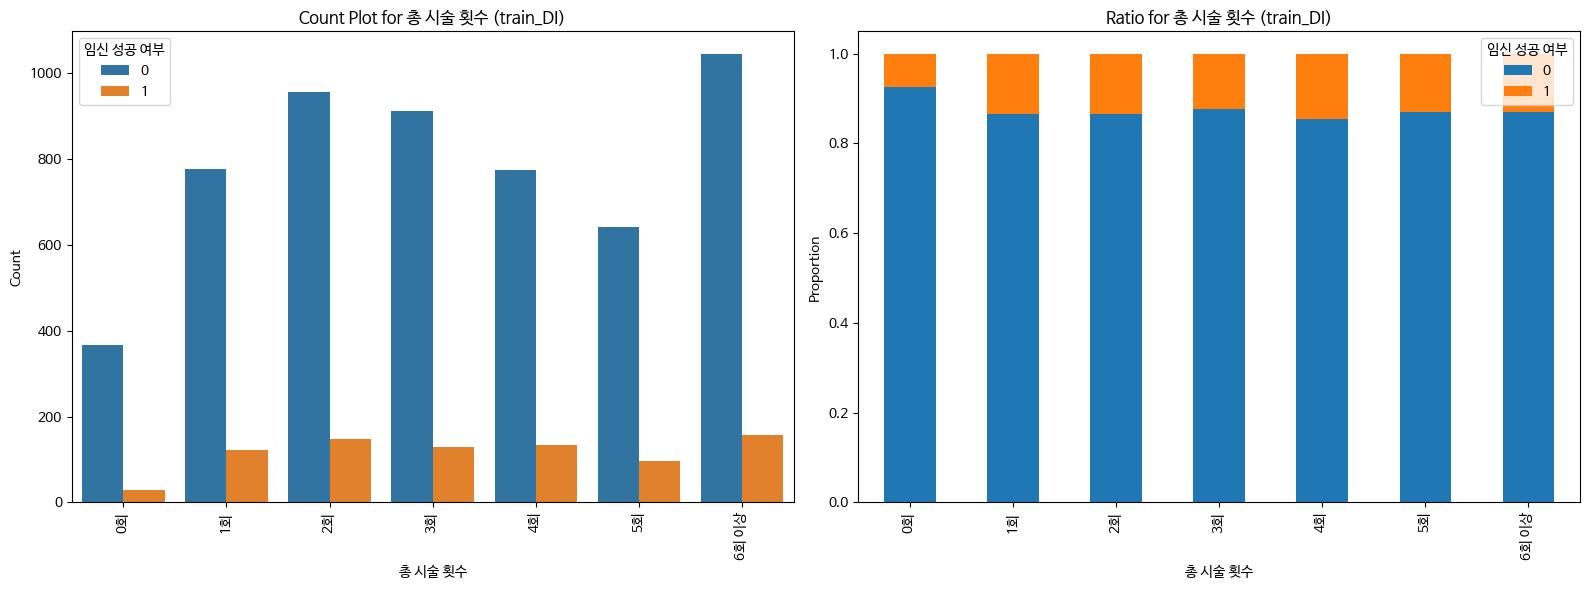

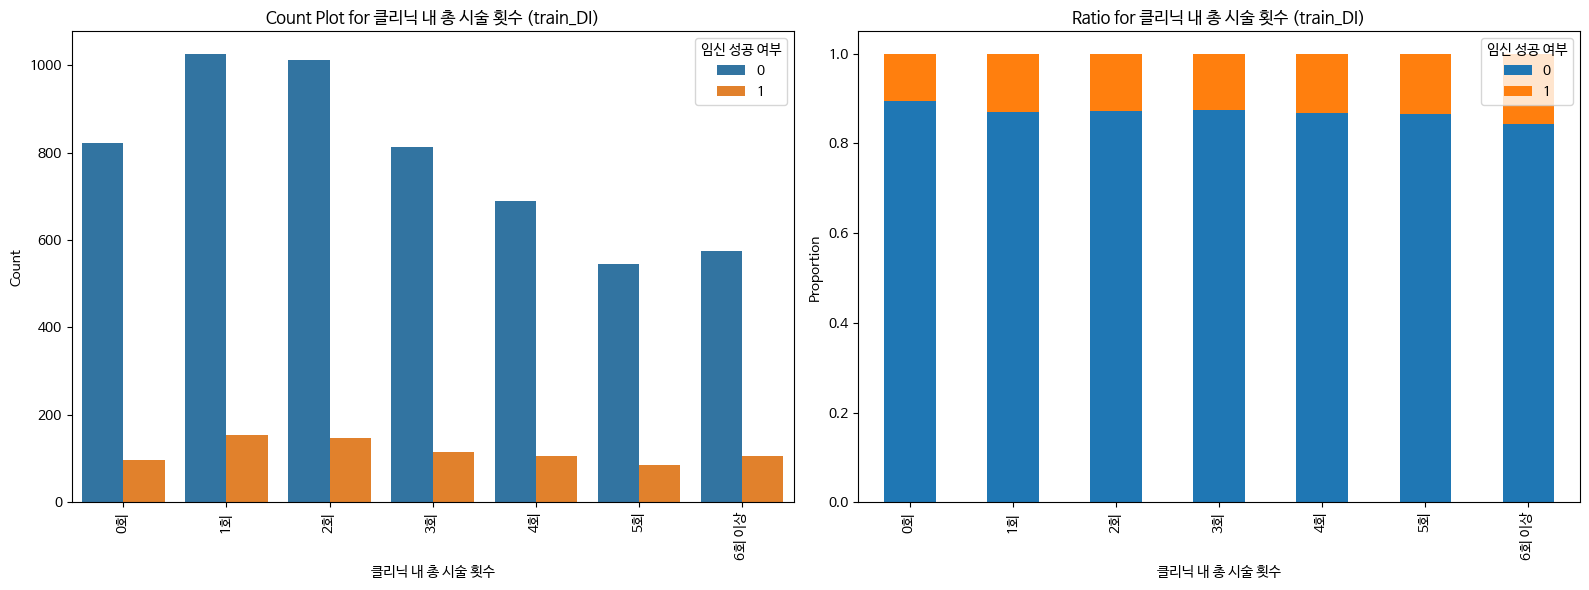

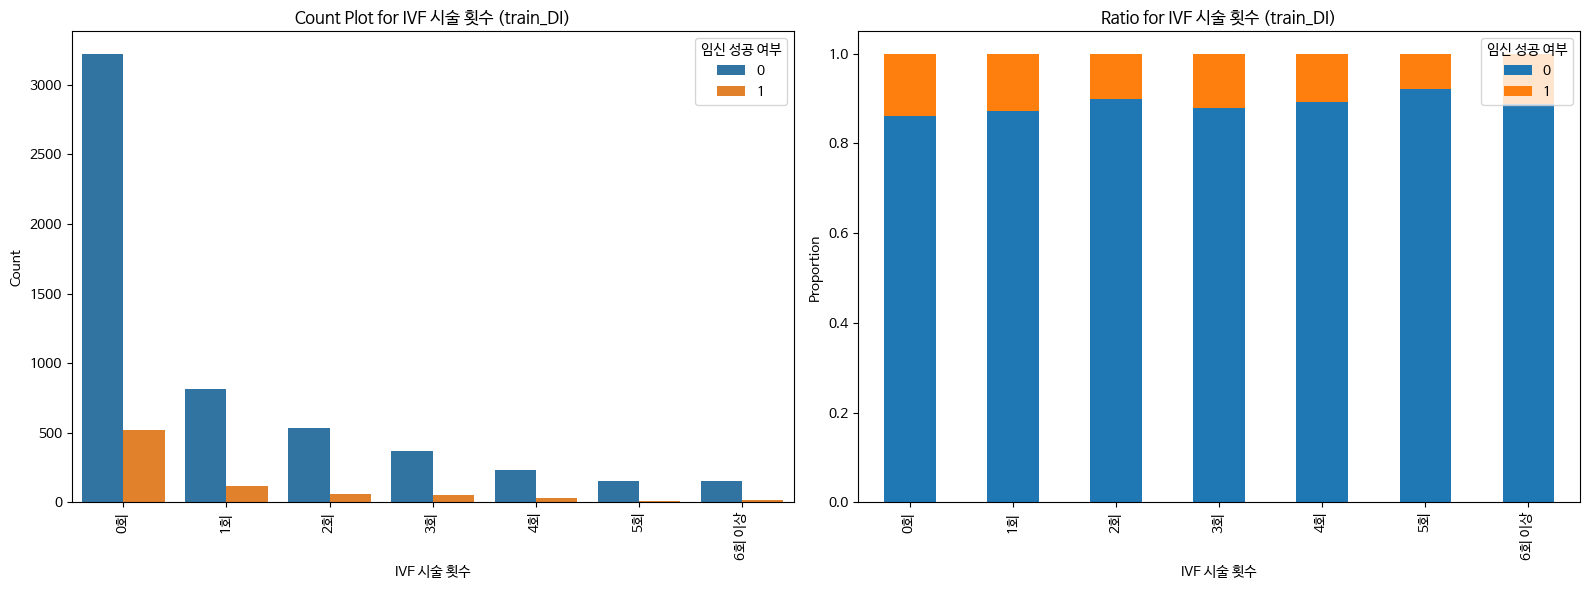

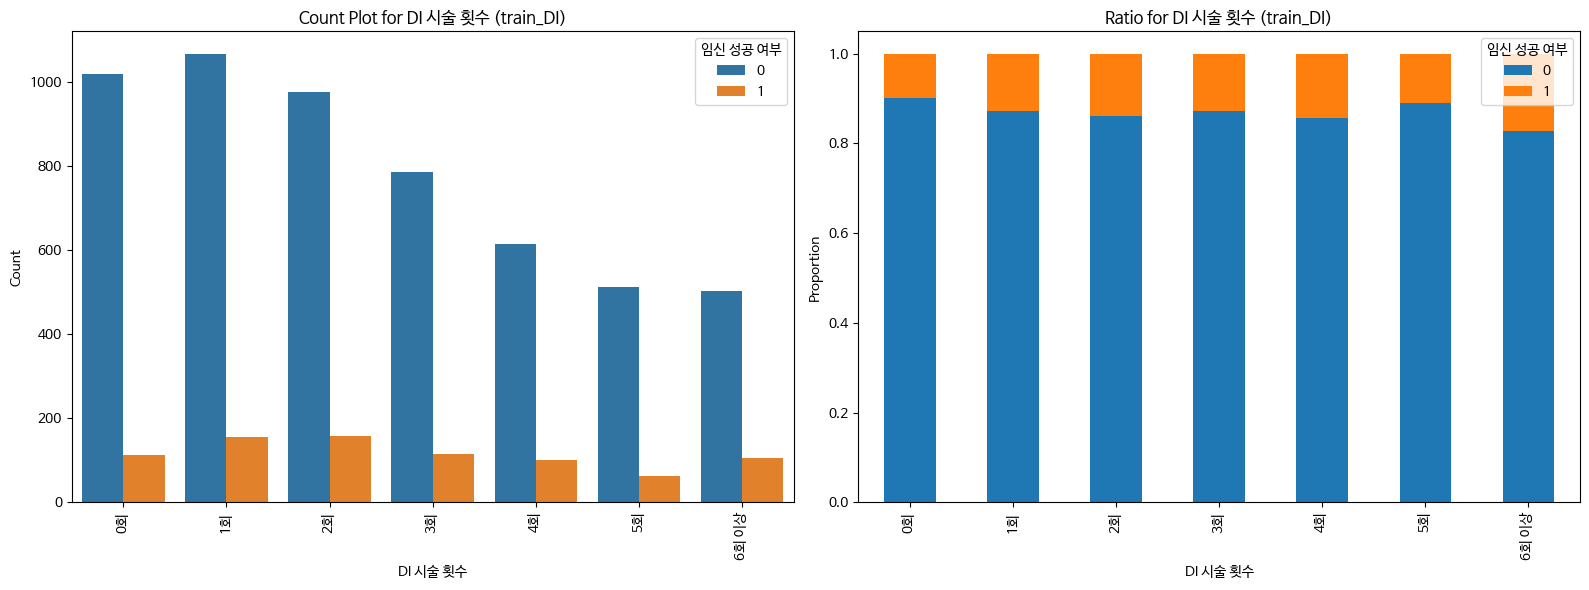

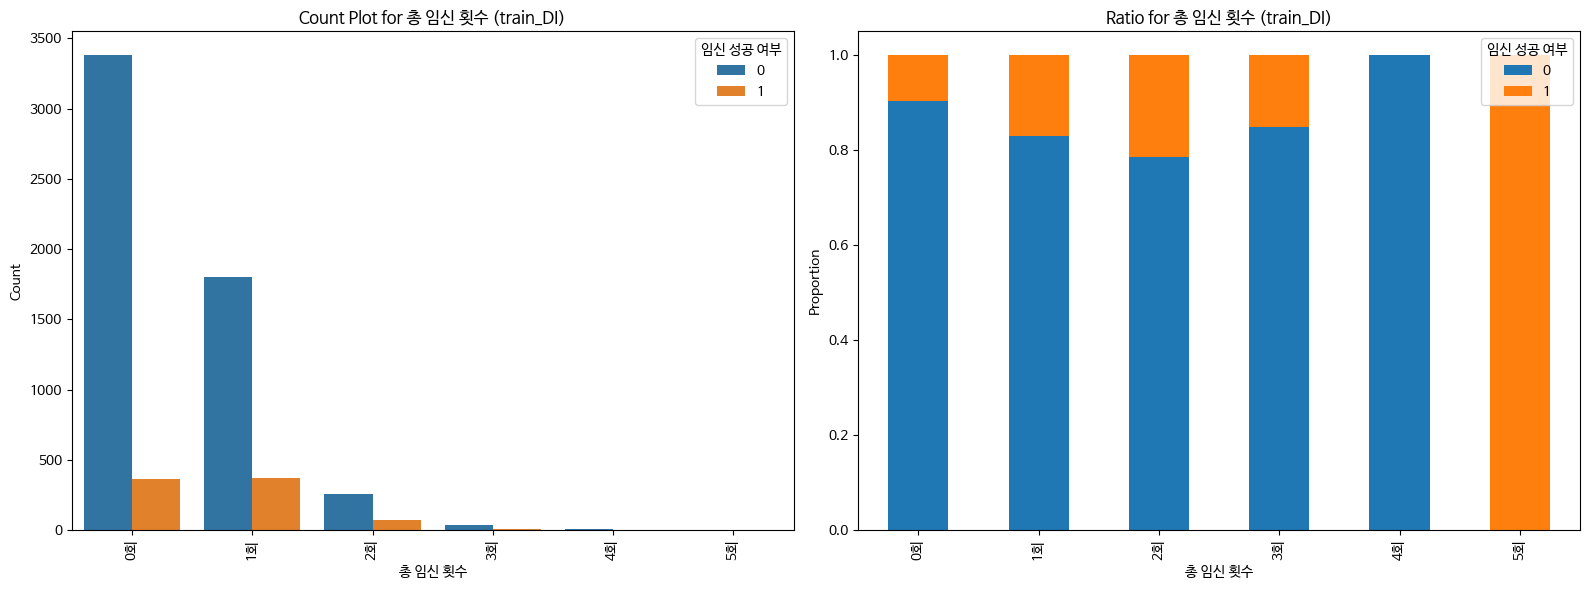

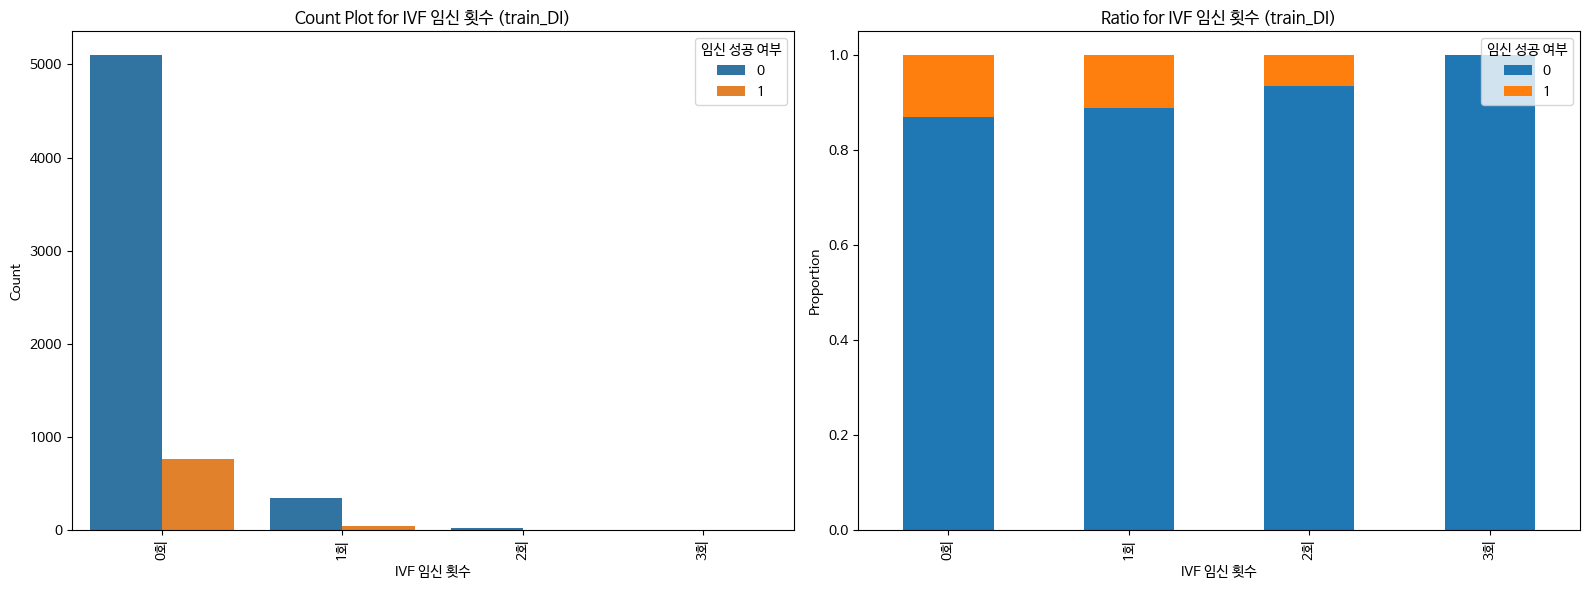

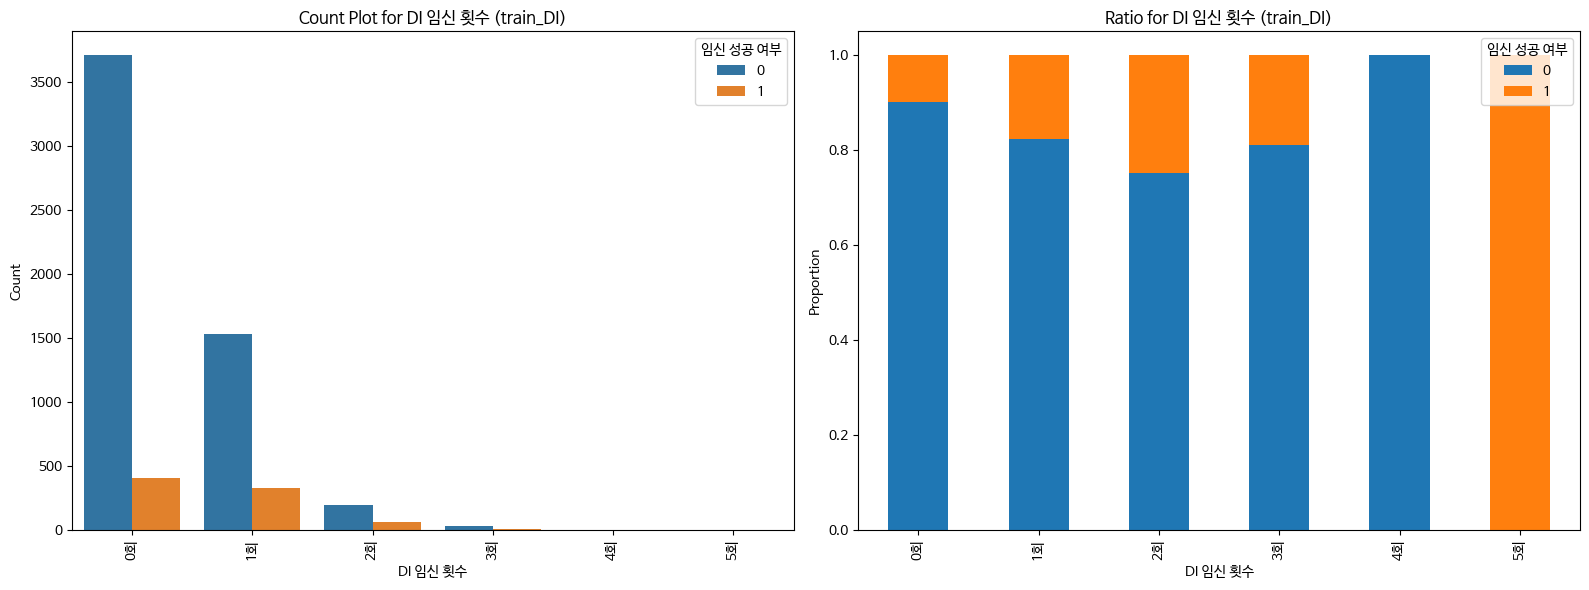

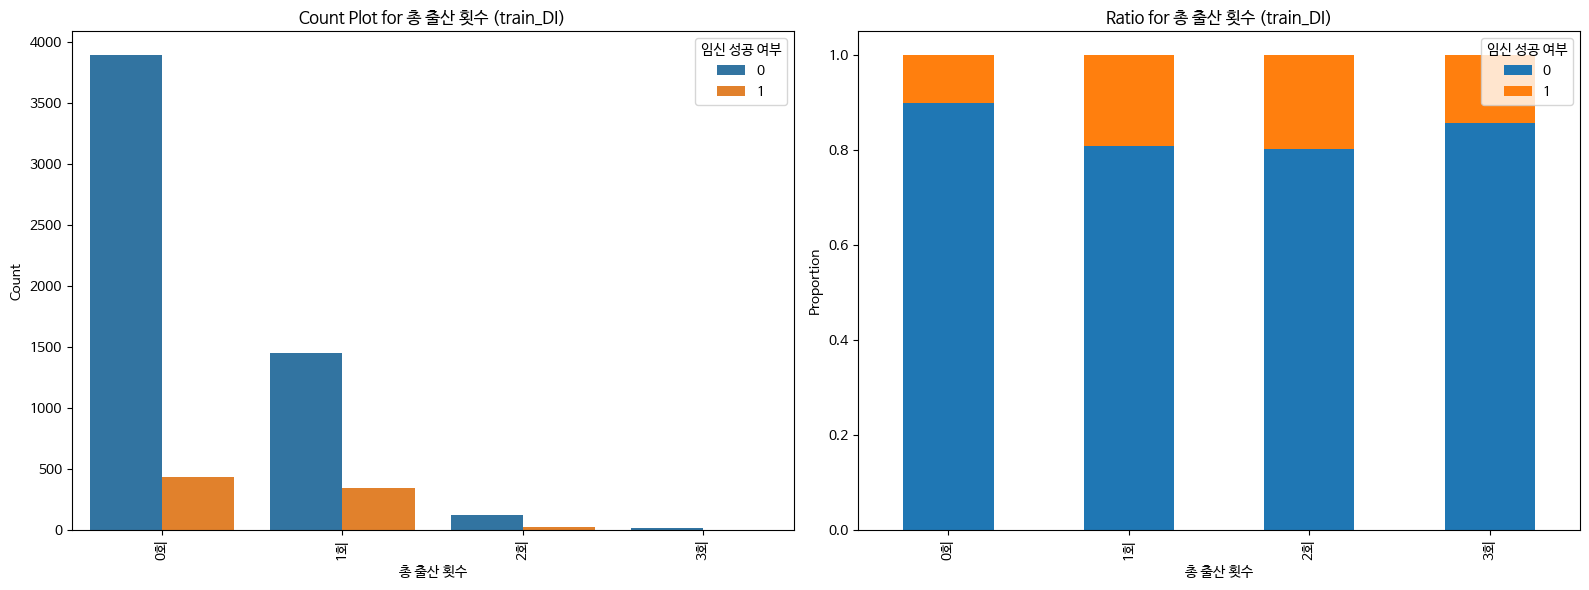

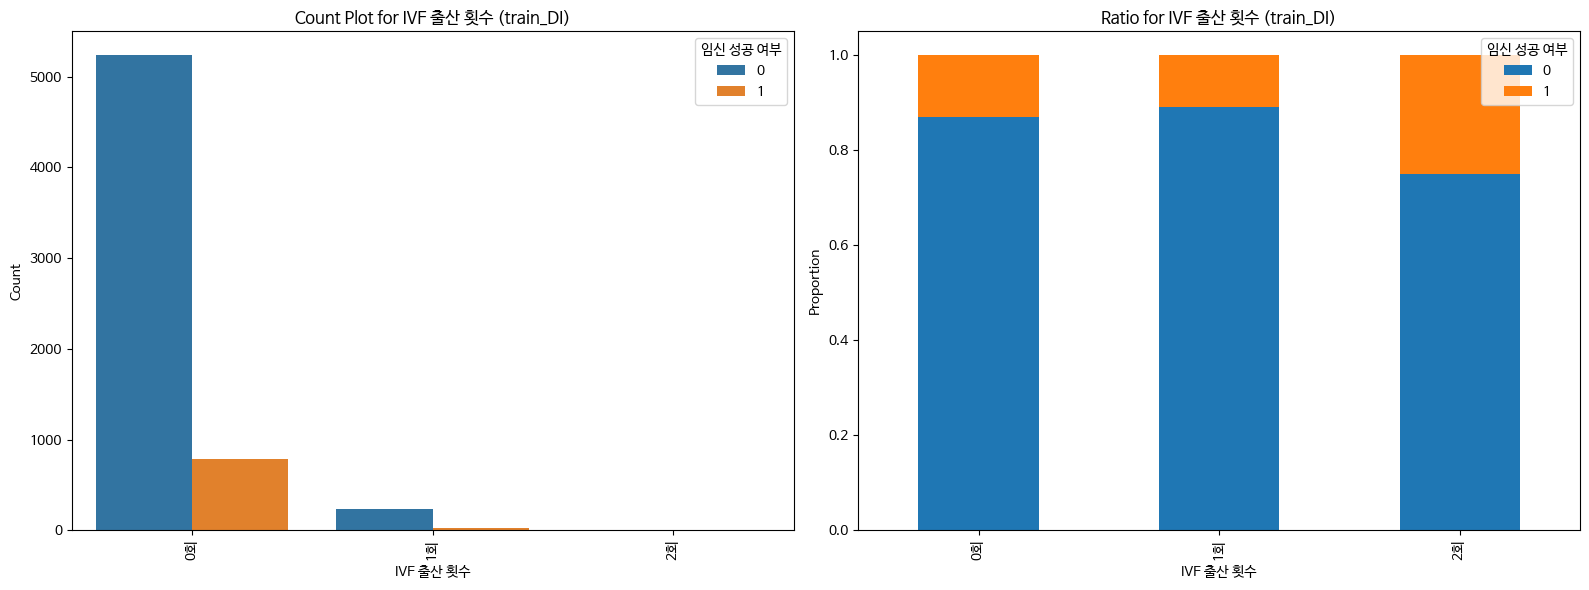

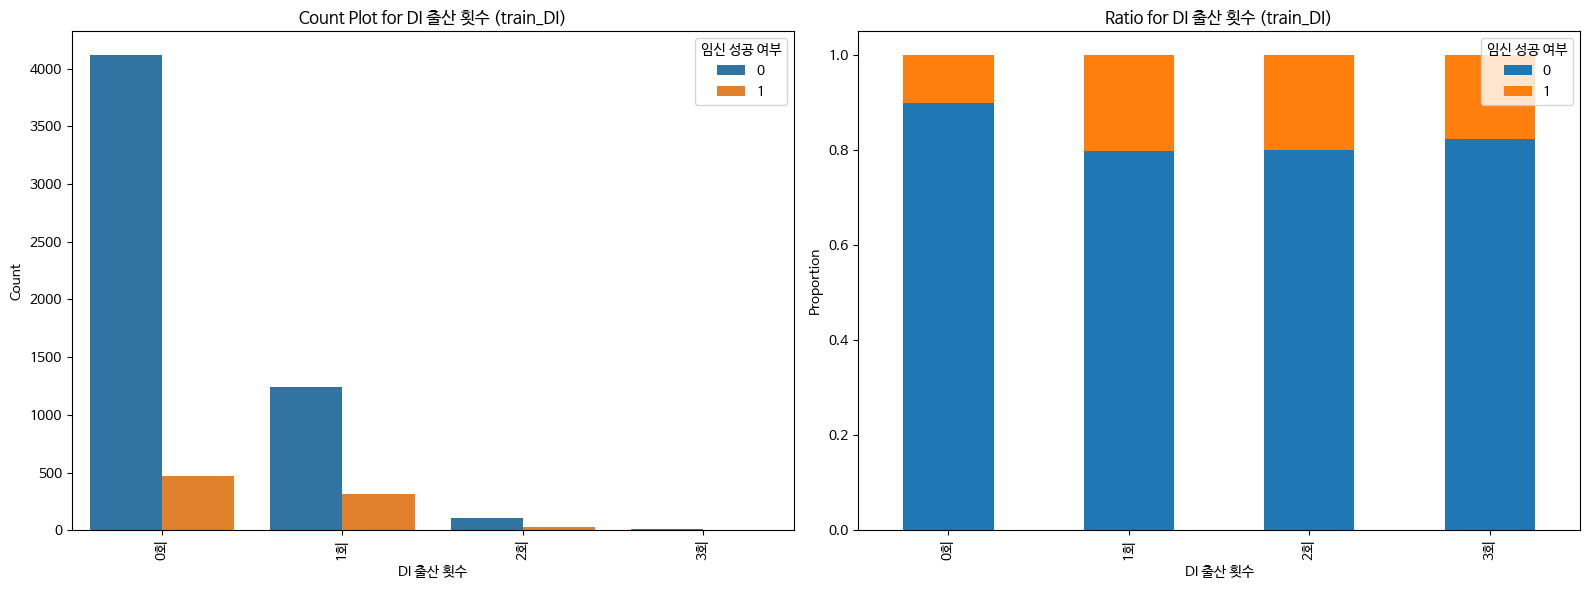

### train_IVF Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî ###


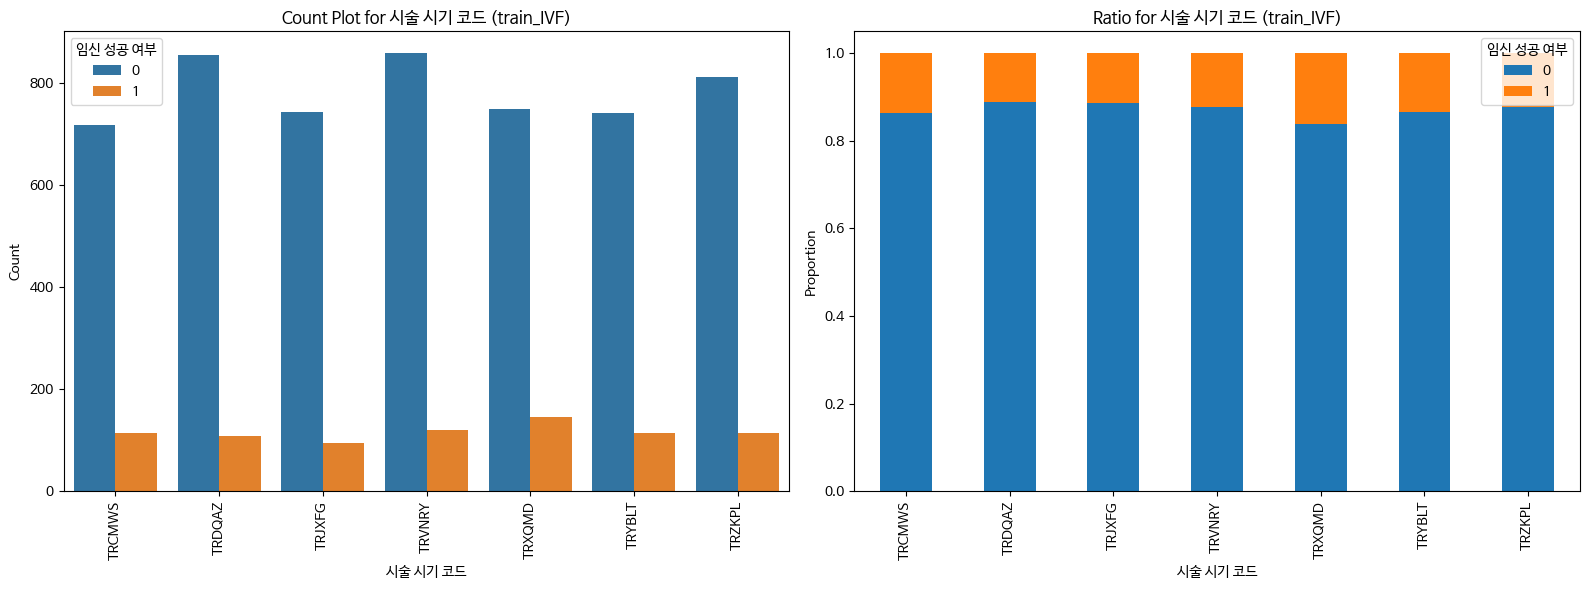

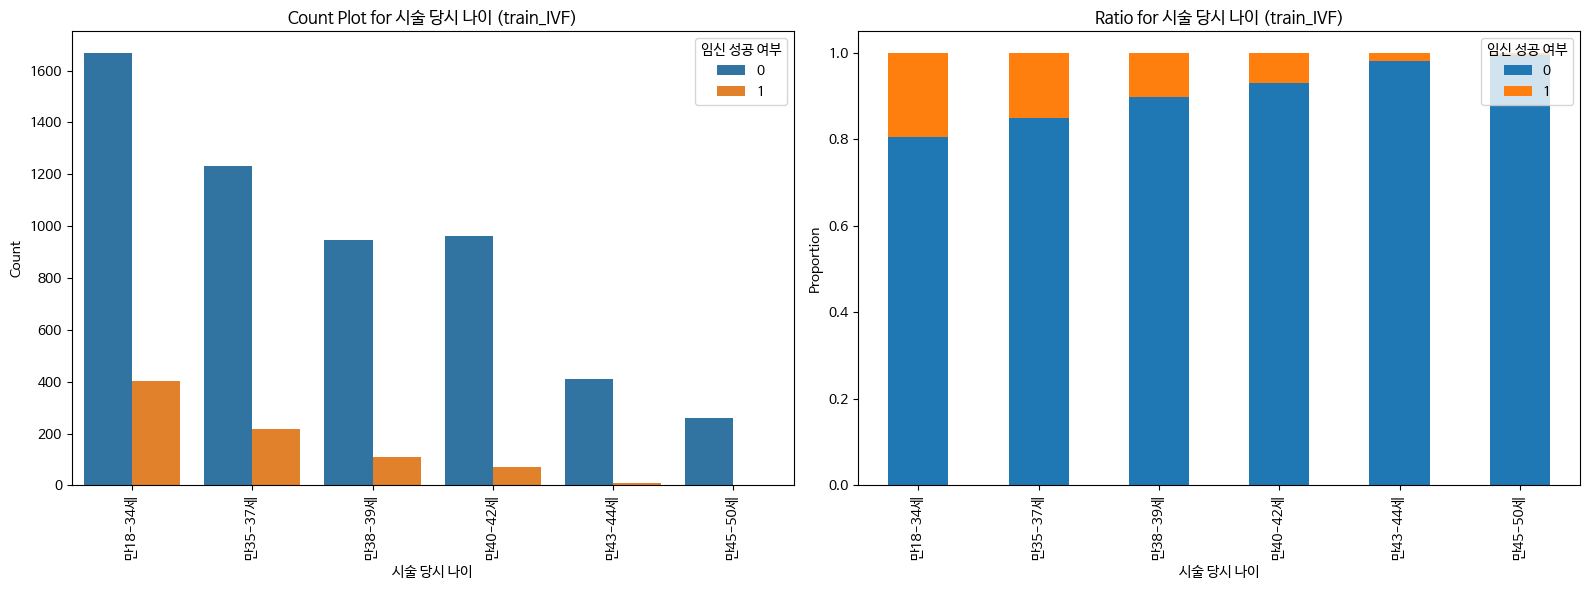

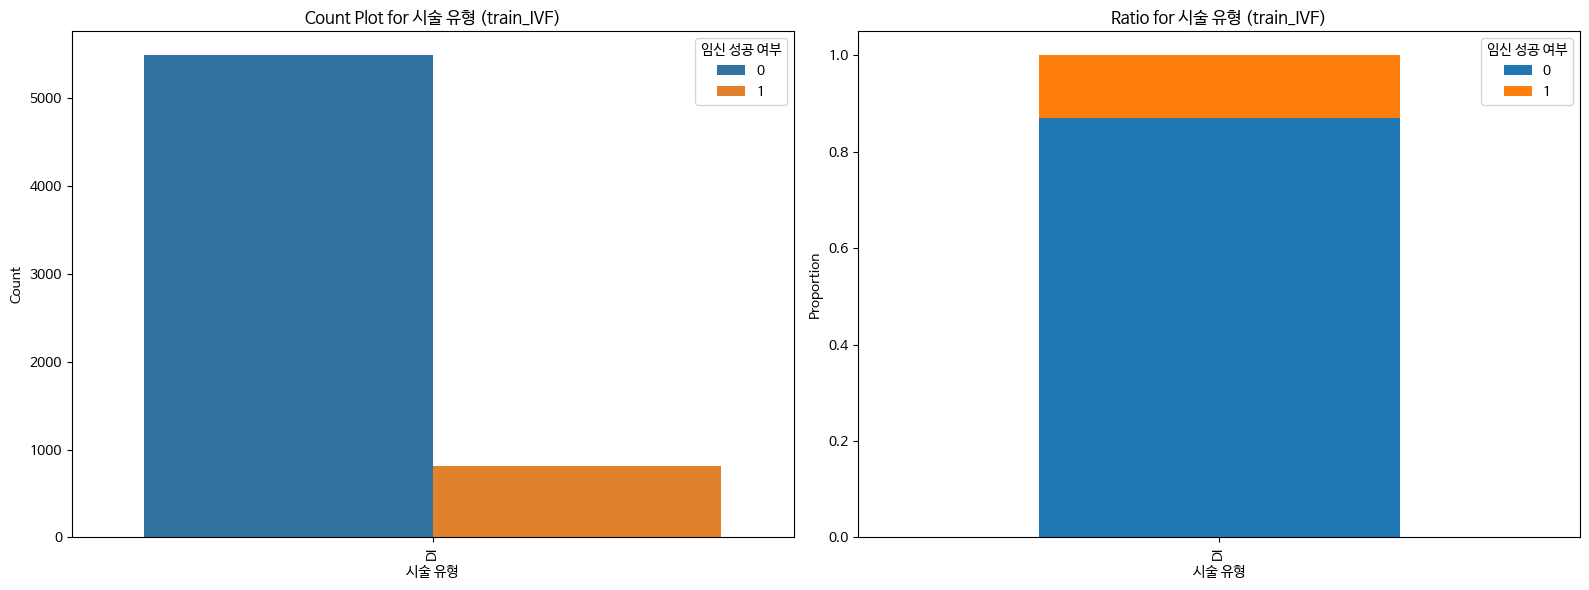

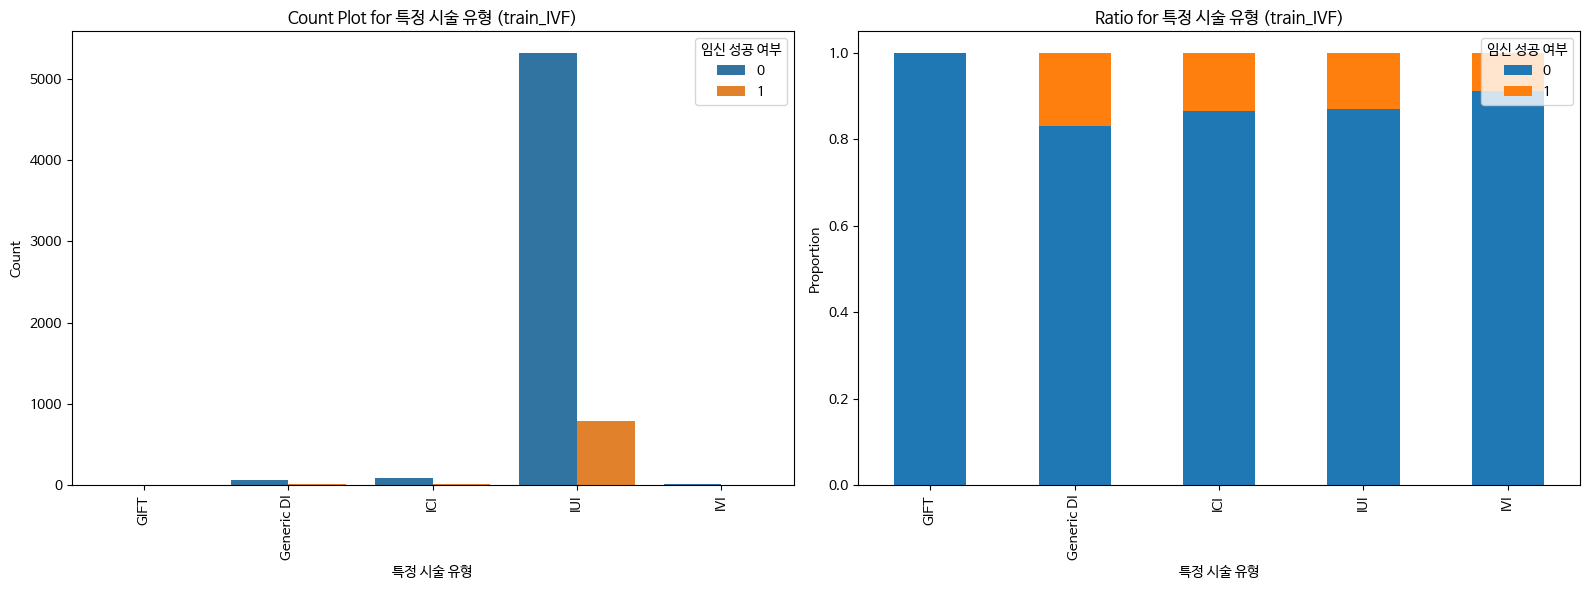

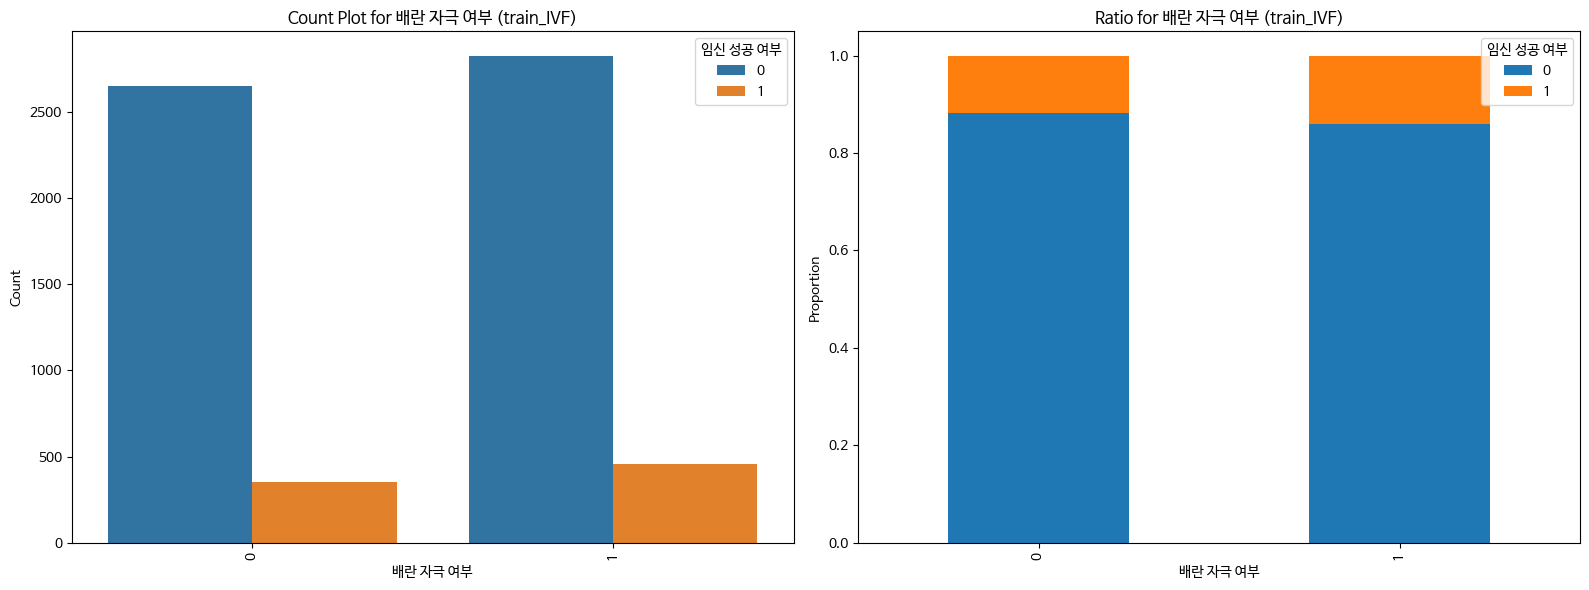

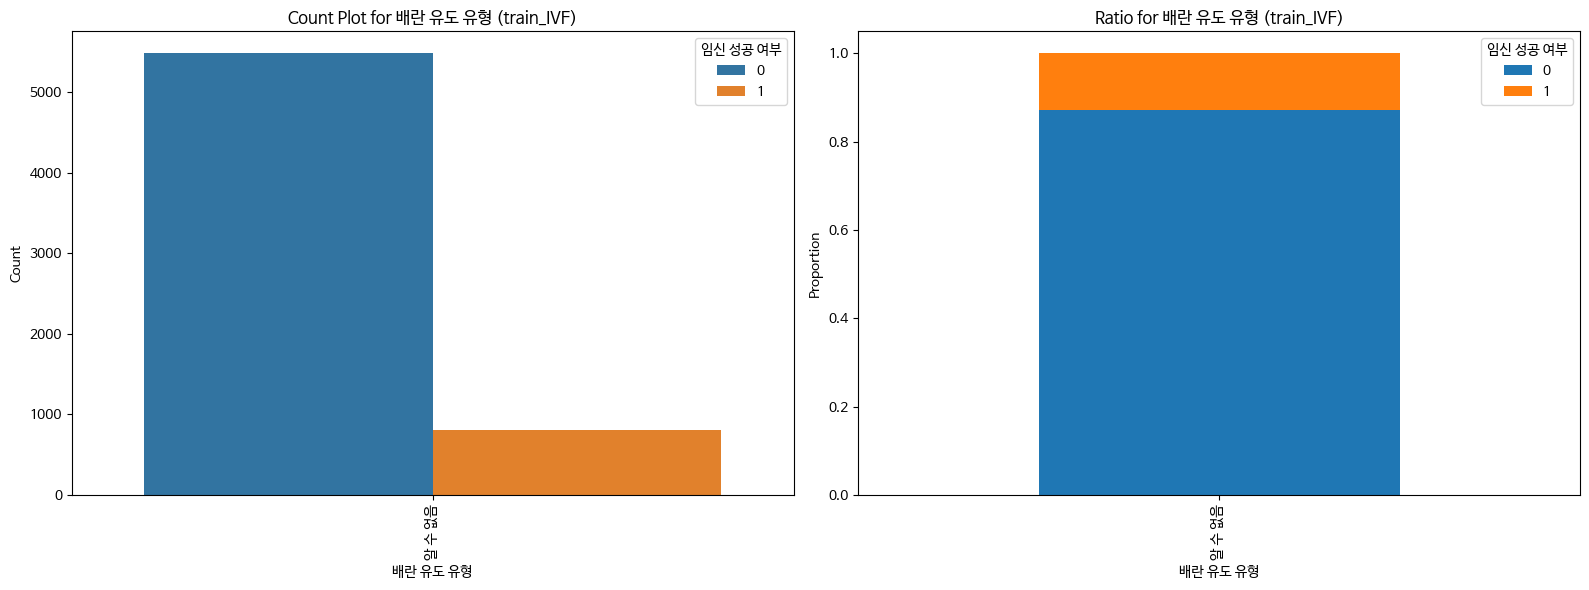

Îã®Ïùº Î∞∞ÏïÑ Ïù¥Ïãù Ïó¨Î∂Ä Ïª¨ÎüºÏóêÏÑú ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä Í∞íÏù¥ ÌïòÎÇòÎßå Ï°¥Ïû¨ÌïòÏó¨ ÏãúÍ∞ÅÌôîÎ•º Í±¥ÎÑàÎúÅÎãàÎã§.
Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ Í≤ÄÏÇ¨ ÏÇ¨Ïö© Ïó¨Î∂Ä Ïª¨ÎüºÏóêÏÑú ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä Í∞íÏù¥ ÌïòÎÇòÎßå Ï°¥Ïû¨ÌïòÏó¨ ÏãúÍ∞ÅÌôîÎ•º Í±¥ÎÑàÎúÅÎãàÎã§.
Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ ÏßÑÎã® ÏÇ¨Ïö© Ïó¨Î∂Ä Ïª¨ÎüºÏóêÏÑú ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä Í∞íÏù¥ ÌïòÎÇòÎßå Ï°¥Ïû¨ÌïòÏó¨ ÏãúÍ∞ÅÌôîÎ•º Í±¥ÎÑàÎúÅÎãàÎã§.
Î∞∞ÏïÑ ÏÉùÏÑ± Ï£ºÏöî Ïù¥Ïú† Ïª¨ÎüºÏóêÏÑú ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä Í∞íÏù¥ ÌïòÎÇòÎßå Ï°¥Ïû¨ÌïòÏó¨ ÏãúÍ∞ÅÌôîÎ•º Í±¥ÎÑàÎúÅÎãàÎã§.


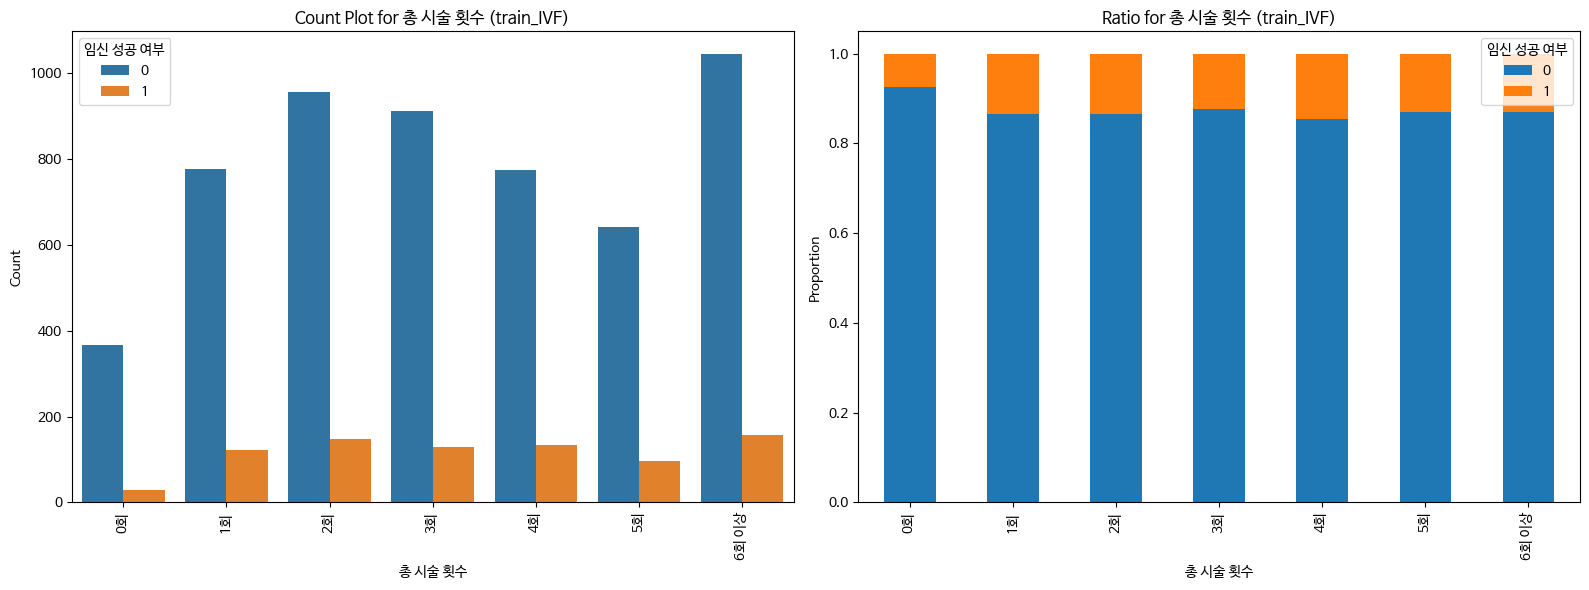

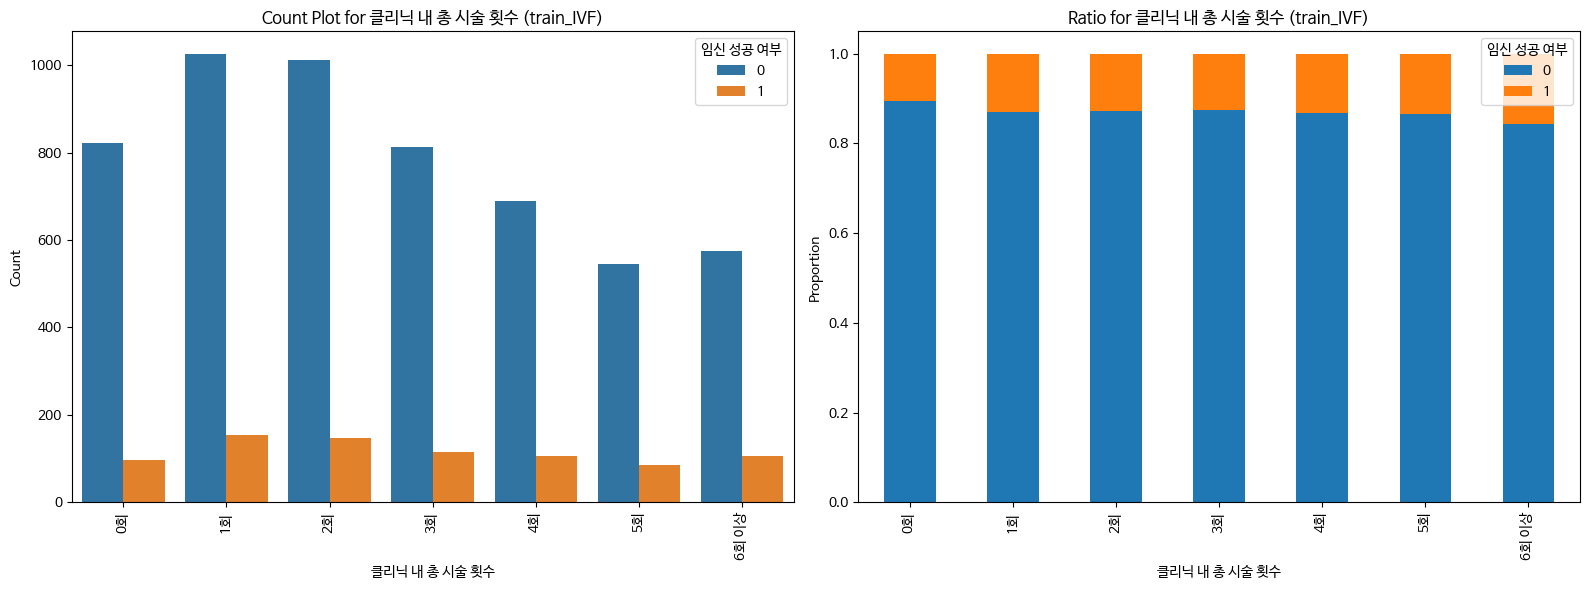

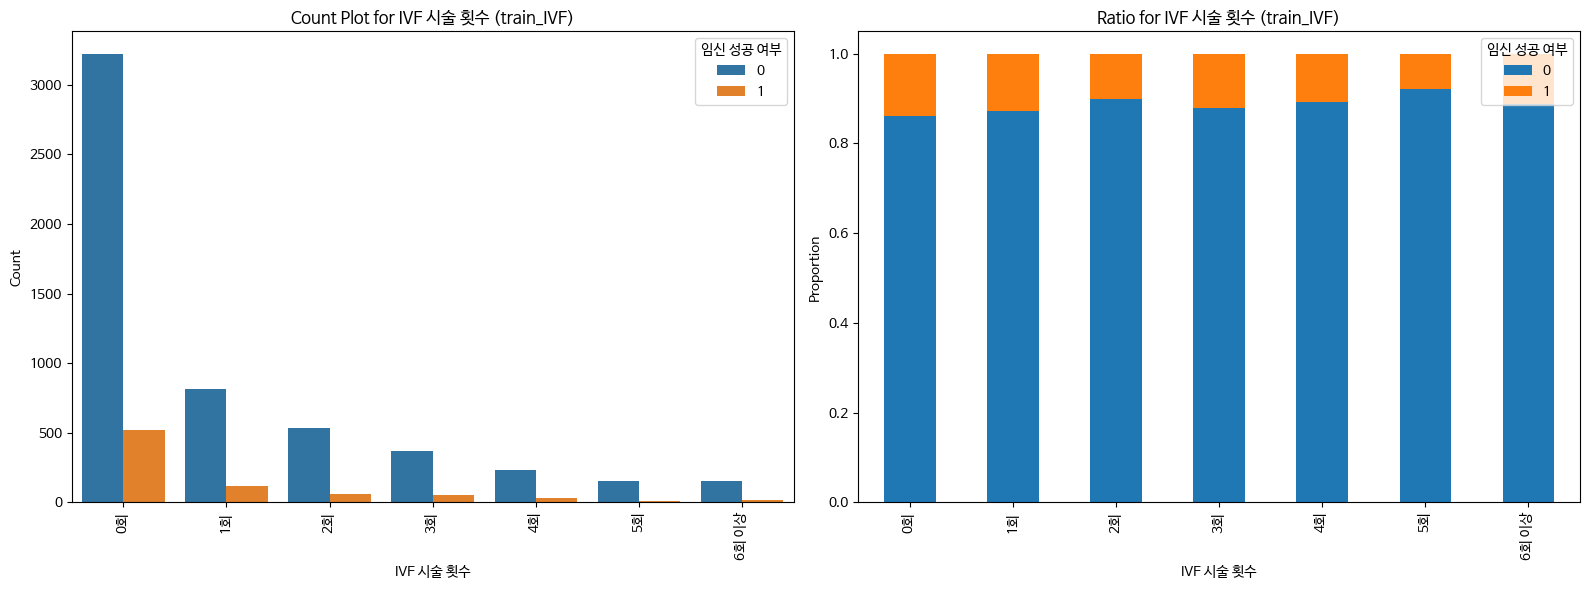

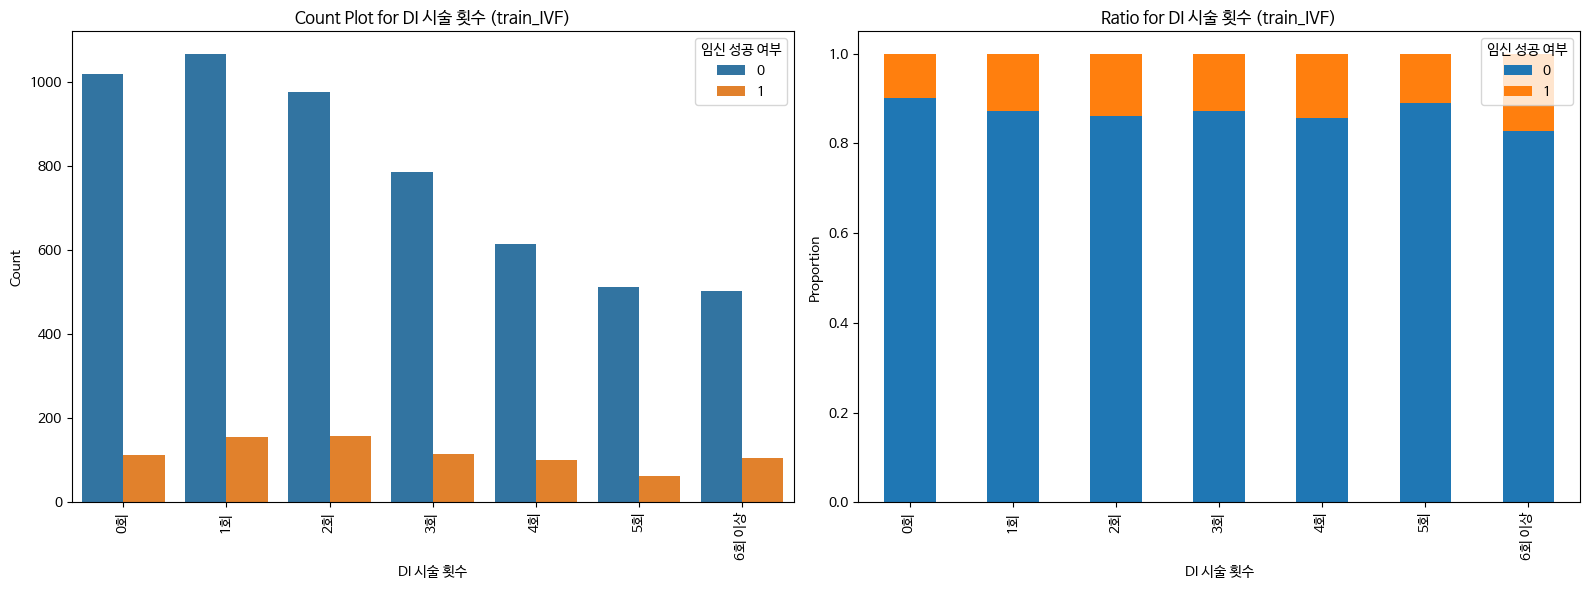

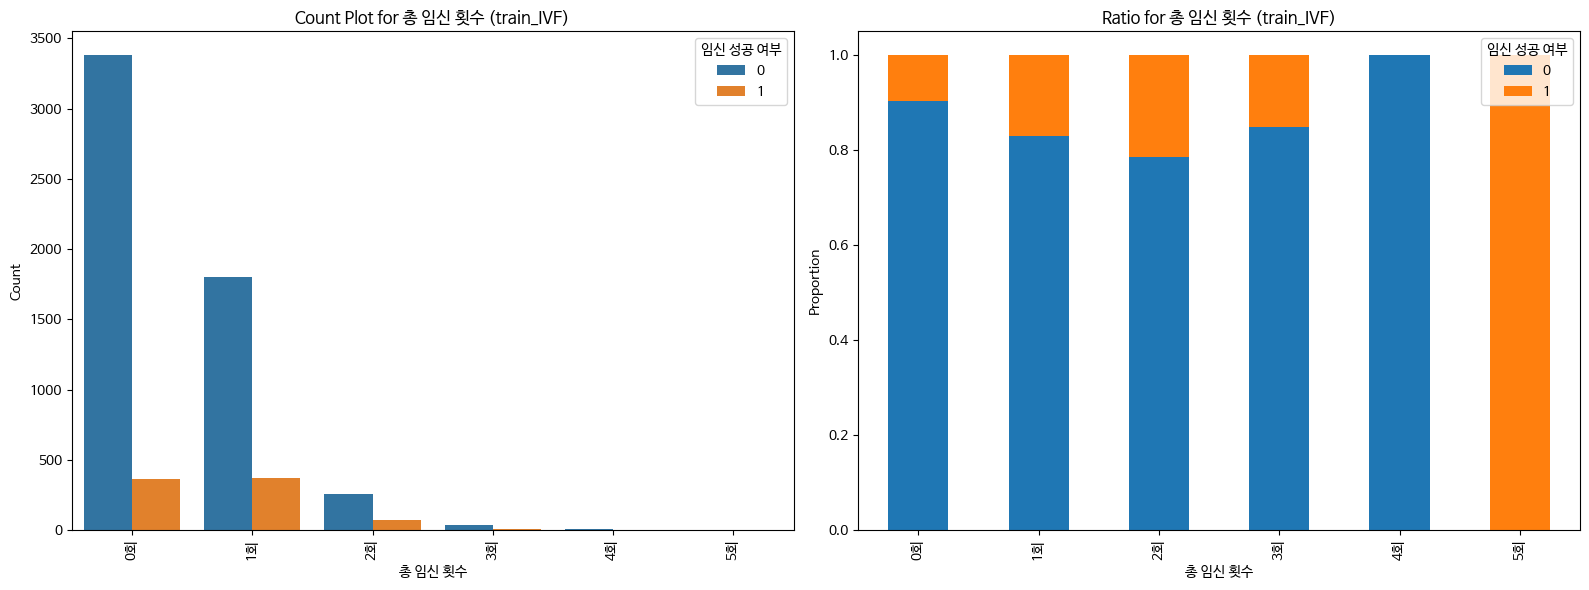

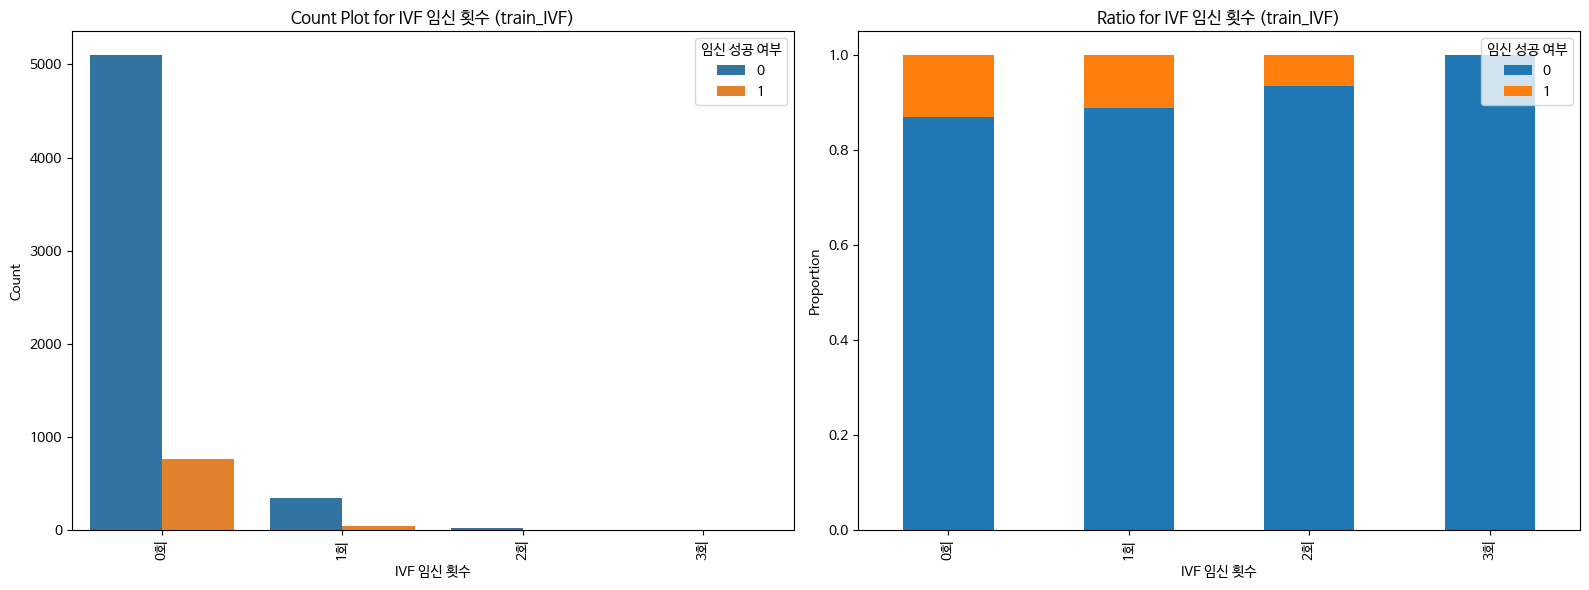

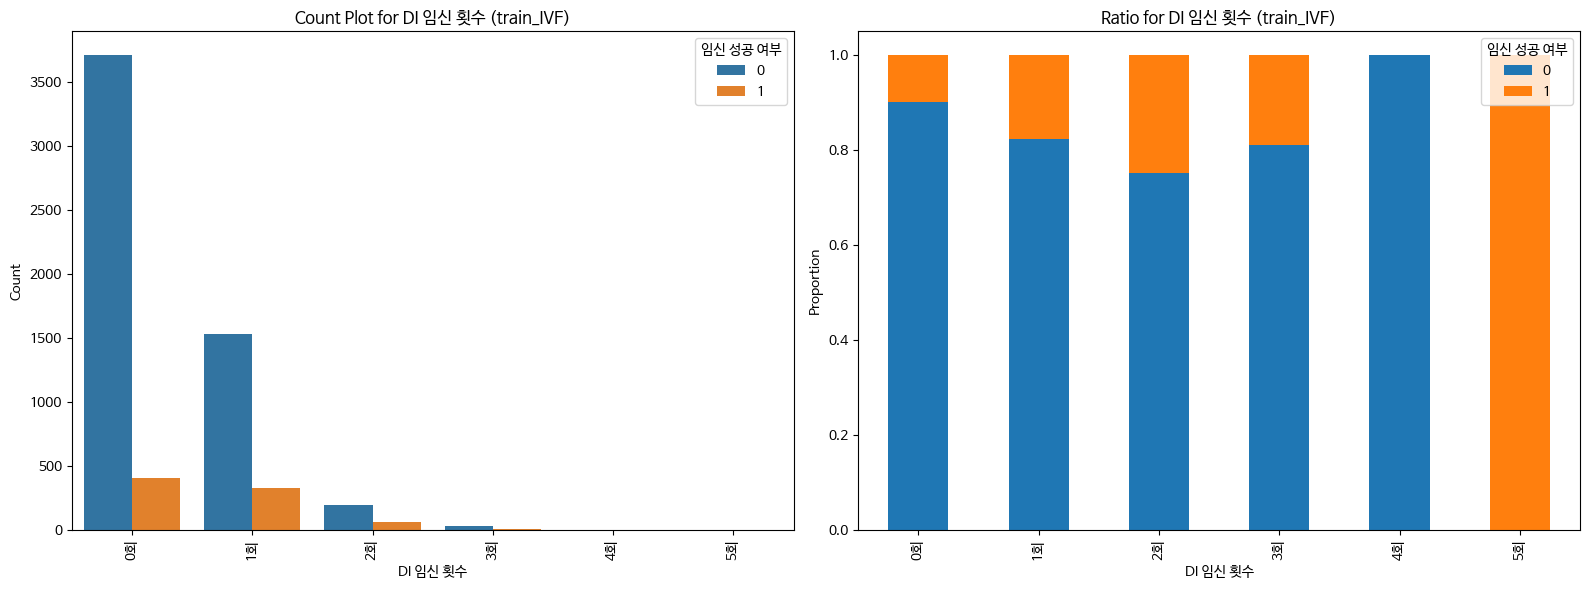

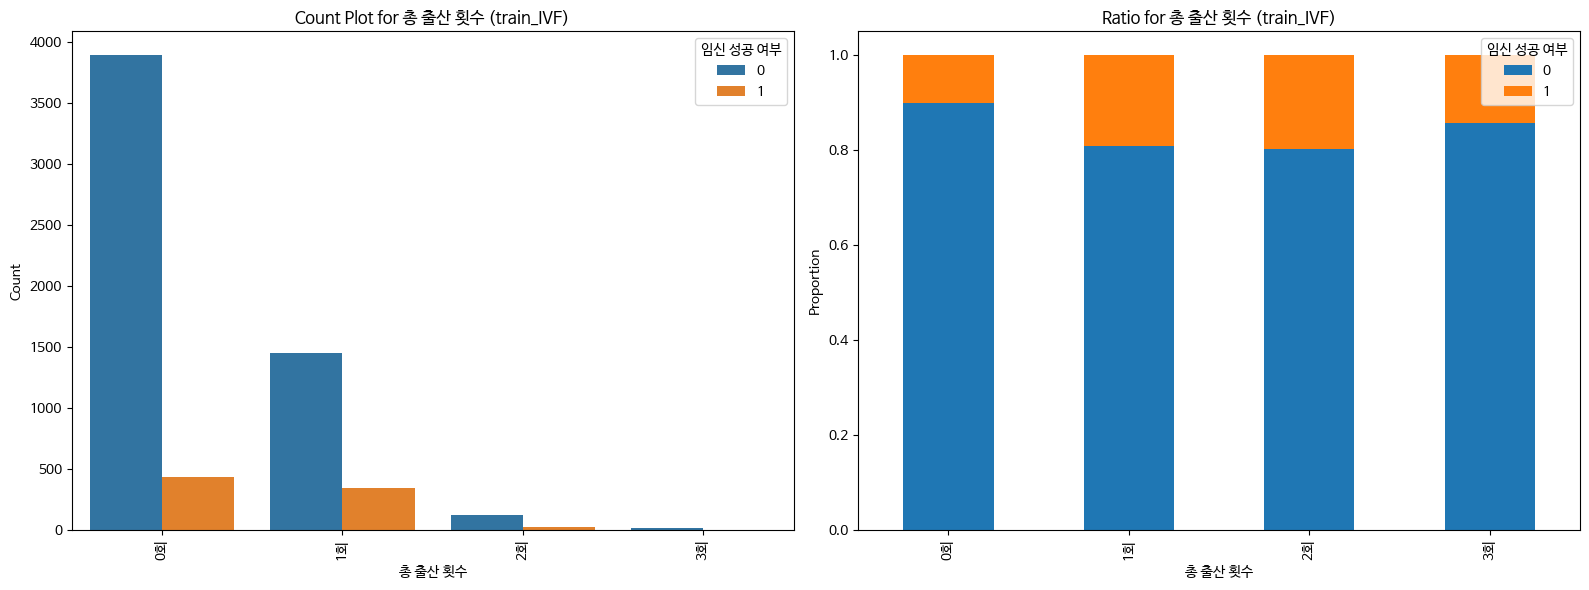

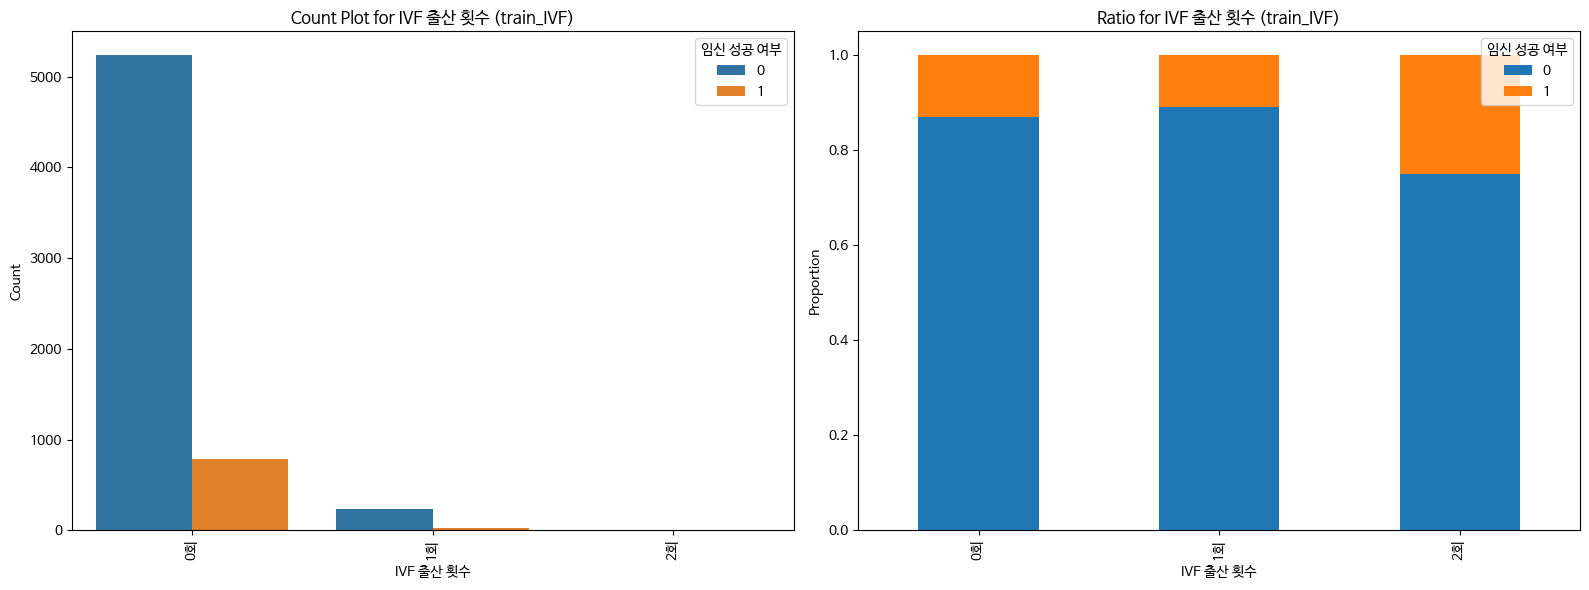

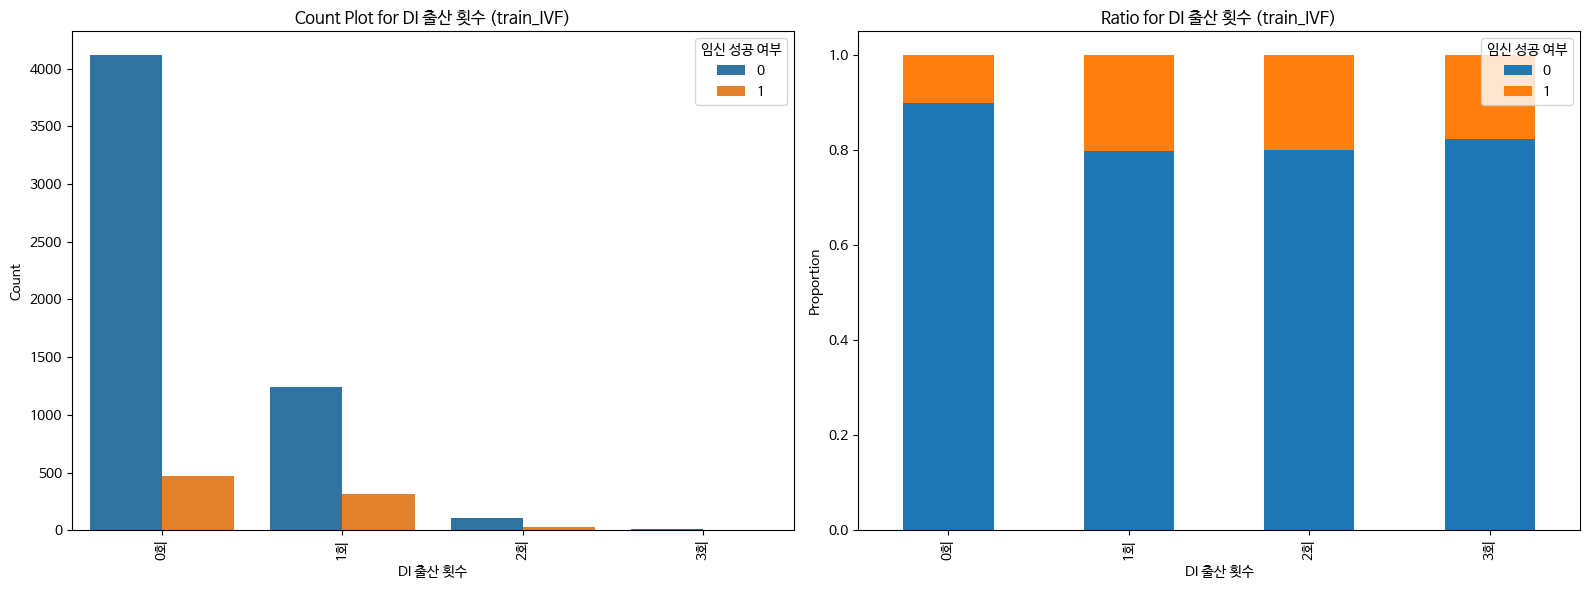

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ÏãúÍ∞ÅÌôîÏóê ÏÇ¨Ïö©Ìï† Î≤îÏ£ºÌòï Ïª¨Îüº Î¶¨Ïä§Ìä∏
categorical_columns = [
    "ÏãúÏà† ÏãúÍ∏∞ ÏΩîÎìú", "ÏãúÏà† ÎãπÏãú ÎÇòÏù¥", "ÏãúÏà† Ïú†Ìòï", "ÌäπÏ†ï ÏãúÏà† Ïú†Ìòï",
    "Î∞∞ÎûÄ ÏûêÍ∑π Ïó¨Î∂Ä", "Î∞∞ÎûÄ Ïú†ÎèÑ Ïú†Ìòï", "Îã®Ïùº Î∞∞ÏïÑ Ïù¥Ïãù Ïó¨Î∂Ä", "Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ Í≤ÄÏÇ¨ ÏÇ¨Ïö© Ïó¨Î∂Ä",
    "Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ ÏßÑÎã® ÏÇ¨Ïö© Ïó¨Î∂Ä", "Î∞∞ÏïÑ ÏÉùÏÑ± Ï£ºÏöî Ïù¥Ïú†", "Ï¥ù ÏãúÏà† ÌöüÏàò", "ÌÅ¥Î¶¨Îãâ ÎÇ¥ Ï¥ù ÏãúÏà† ÌöüÏàò",
    "IVF ÏãúÏà† ÌöüÏàò", "DI ÏãúÏà† ÌöüÏàò", "Ï¥ù ÏûÑÏã† ÌöüÏàò", "IVF ÏûÑÏã† ÌöüÏàò", "DI ÏûÑÏã† ÌöüÏàò",
    "Ï¥ù Ï∂úÏÇ∞ ÌöüÏàò", "IVF Ï∂úÏÇ∞ ÌöüÏàò", "DI Ï∂úÏÇ∞ ÌöüÏàò"
]

TARGET = "ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä"

# Îç∞Ïù¥ÌÑ∞ÏÖã Î™©Î°ù
datasets = {
    "train_DI": train_DI,
    "train_IVF": train_IVF
}

# ÏãúÍ∞ÅÌôî ÏàòÌñâ
for dataset_name, train in datasets.items():
    print(f"### {dataset_name} Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî ###")

    for cat_col in categorical_columns:
        if cat_col not in train.columns:
            print(f"Ïª¨Îüº {cat_col}Ïù¥(Í∞Ä) {dataset_name} Îç∞Ïù¥ÌÑ∞Ïóê Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.")
            continue

        # TARGET Ïª¨Îüº ÌôïÏù∏
        if TARGET not in train.columns:
            print(f"TARGET Ïª¨Îüº '{TARGET}'Ïù¥(Í∞Ä) {dataset_name} Îç∞Ïù¥ÌÑ∞Ïóê Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.")
            continue

        # Î≤îÏ£ºÎ≥Ñ TARGET ÎπàÎèÑ Í≥ÑÏÇ∞
        grouped = train.groupby(cat_col)[TARGET].value_counts().unstack(fill_value=0)

        # unstack ÌõÑ Îç∞Ïù¥ÌÑ∞Í∞Ä 2Ï∞®ÏõêÏù¥ ÏïÑÎãê Í≤ΩÏö∞ Í±¥ÎÑàÎõ∞Í∏∞
        if grouped.shape[1] < 2:
            print(f"{cat_col} Ïª¨ÎüºÏóêÏÑú {TARGET} Í∞íÏù¥ ÌïòÎÇòÎßå Ï°¥Ïû¨ÌïòÏó¨ ÏãúÍ∞ÅÌôîÎ•º Í±¥ÎÑàÎúÅÎãàÎã§.")
            continue

        # xÏ∂ï ÏàúÏÑú ÏßÄÏ†ï
        order = grouped.index.tolist()

        # ÌïòÎÇòÏùò figureÏóê 1Ìñâ 2Ïó¥Ïùò subplot ÏÉùÏÑ±
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))

        # ÏôºÏ™Ω subplot: Count Plot
        sns.countplot(x=cat_col, hue=TARGET, data=train, ax=axes[0], order=order)
        axes[0].set_title(f"Count Plot for {cat_col} ({dataset_name})")
        axes[0].set_xlabel(cat_col)
        axes[0].set_ylabel("Count")
        axes[0].tick_params(axis='x', rotation=90)

        # Ïò§Î•∏Ï™Ω subplot: Stacked Bar Plot (Í∞Å Î≤îÏ£ºÎ≥Ñ TARGET ÎπÑÏú®)
        percentages = grouped.div(grouped.sum(axis=1), axis=0)

        # Ïä§ÌÉùÌòï ÎßâÎåÄ Í∑∏ÎûòÌîÑ Ï∂úÎ†•
        percentages.plot(kind='bar', stacked=True, ax=axes[1])
        axes[1].set_title(f"Ratio for {cat_col} ({dataset_name})")
        axes[1].set_xlabel(cat_col)
        axes[1].set_ylabel("Proportion")
        axes[1].tick_params(axis='x', rotation=90)
        axes[1].legend(title=TARGET, loc='upper right')

        plt.tight_layout()
        plt.show()


In [ ]:
# ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä(TARGET)ÏôÄ Í∞Å Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò Í¥ÄÍ≥Ñ Î∂ÑÏÑù
import numpy as np

# Í≤∞Í≥º Ï†ÄÏû•Ïö© Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
success_rates = []

for dataset_name, train in {"train_DI": train_DI, "train_IVF": train_IVF}.items():
    for cat_col in categorical_columns:
        if cat_col in train.columns and TARGET in train.columns:
            # Í∞Å Î≤îÏ£ºÎ≥Ñ ÏûÑÏã† ÏÑ±Í≥µÎ•† Í≥ÑÏÇ∞
            grouped = train.groupby(cat_col)[TARGET].mean()
            # ÏµúÎåÄ/ÏµúÏÜå ÏÑ±Í≥µÎ•† Î∞è Ï∞®Ïù¥ Í≥ÑÏÇ∞
            max_success = grouped.max()
            min_success = grouped.min()
            diff = max_success - min_success

            success_rates.append({
                "Dataset": dataset_name,
                "Feature": cat_col,
                "Max Success Rate": max_success,
                "Min Success Rate": min_success,
                "Difference": diff
            })

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥ÄÌôò ÌõÑ ÏÑ±Í≥µÎ•† Ï∞®Ïù¥Í∞Ä ÌÅ∞ ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨
success_rates_df = pd.DataFrame(success_rates).sort_values(by="Difference", ascending=False)

# Í≤∞Í≥º ÌëúÏãú
print("### ÏûÑÏã† ÏÑ±Í≥µÎ•†Ïù¥ ÌÅ∞ Ï∞®Ïù¥Î•º Î≥¥Ïù¥Îäî Î≥ÄÏàò ###")
print(success_rates_df)


### ÏûÑÏã† ÏÑ±Í≥µÎ•†Ïù¥ ÌÅ∞ Ï∞®Ïù¥Î•º Î≥¥Ïù¥Îäî Î≥ÄÏàò ###
      Dataset           Feature  Max Success Rate  Min Success Rate  \
16   train_DI          DI ÏûÑÏã† ÌöüÏàò          1.000000          0.000000   
34  train_IVF           Ï¥ù ÏûÑÏã† ÌöüÏàò          1.000000          0.000000   
36  train_IVF          DI ÏûÑÏã† ÌöüÏàò          1.000000          0.000000   
14   train_DI           Ï¥ù ÏûÑÏã† ÌöüÏàò          1.000000          0.000000   
21  train_IVF          ÏãúÏà† ÎãπÏãú ÎÇòÏù¥          0.194592          0.003817   
1    train_DI          ÏãúÏà† ÎãπÏãú ÎÇòÏù¥          0.194592          0.003817   
3    train_DI          ÌäπÏ†ï ÏãúÏà† Ïú†Ìòï          0.169014          0.000000   
23  train_IVF          ÌäπÏ†ï ÏãúÏà† Ïú†Ìòï          0.169014          0.000000   
18   train_DI         IVF Ï∂úÏÇ∞ ÌöüÏàò          0.250000          0.109434   
38  train_IVF         IVF Ï∂úÏÇ∞ ÌöüÏàò          0.250000          0.109434   
35  train_IVF         IVF ÏûÑÏã† ÌöüÏàò          0.130435   

In [ ]:
# Î∞∞ÏïÑ Í¥ÄÎ†® Î≥ÄÏàò Î™©Î°ù
embryo_related_columns = [
    "Ïù¥ÏãùÎêú Î∞∞ÏïÑ Ïàò", "Î∞∞ÏïÑ Ïù¥Ïãù Í≤ΩÍ≥ºÏùº", "Ï†ÄÏû•Îêú Î∞∞ÏïÑ Ïàò", "Ï¥ù ÏÉùÏÑ± Î∞∞ÏïÑ Ïàò",
    "ÌòºÌï©Îêú ÎÇúÏûê Ïàò", "Îã®Ïùº Î∞∞ÏïÑ Ïù¥Ïãù Ïó¨Î∂Ä", "ÎØ∏ÏÑ∏Ï£ºÏûÖ Î∞∞ÏïÑ Ïù¥Ïãù Ïàò",
    "ÎØ∏ÏÑ∏Ï£ºÏûÖ ÌõÑ Ï†ÄÏû•Îêú Î∞∞ÏïÑ Ïàò", "ÏàòÏßëÎêú Ïã†ÏÑ† ÎÇúÏûê Ïàò", "ÎØ∏ÏÑ∏Ï£ºÏûÖÏóêÏÑú ÏÉùÏÑ±Îêú Î∞∞ÏïÑ Ïàò"
]

# Î≤îÏ£ºÌòï Î≥ÄÏàò Î™©Î°ù (ÌäπÏ†ï ÏãúÏà† Ïú†Ìòï, ÎÇòÏù¥, Ï∂úÏÇ∞ ÌöüÏàò Îì± Ìè¨Ìï®)
categorical_columns = [
    "ÌäπÏ†ï ÏãúÏà† Ïú†Ìòï", "ÏãúÏà† ÎãπÏãú ÎÇòÏù¥", "Ï¥ù Ï∂úÏÇ∞ ÌöüÏàò"
]

# Î™©Ìëú Î≥ÄÏàò (TARGET)
target_column = "ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä"


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# IVF Îç∞Ïù¥ÌÑ∞ÏÖã ÏÇ¨Ïö©
data = train_IVF.copy()

# Î∞∞ÏïÑ Í¥ÄÎ†® Î≥ÄÏàòÎ•º Ìè¨Ìï®Ìïú Îç∞Ïù¥ÌÑ∞ÏÖã
X_with_embryo = data.drop(columns=[target_column]).select_dtypes(include=[np.number])
y = data[target_column]

# Î∞∞ÏïÑ Í¥ÄÎ†® Î≥ÄÏàòÎ•º Ï†úÏô∏Ìïú Îç∞Ïù¥ÌÑ∞ÏÖã
X_without_embryo = X_with_embryo.drop(columns=embryo_related_columns, errors='ignore')

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train_with, X_test_with, y_train, y_test = train_test_split(X_with_embryo, y, test_size=0.2, random_state=42, stratify=y)
X_train_without, X_test_without, _, _ = train_test_split(X_without_embryo, y, test_size=0.2, random_state=42, stratify=y)

# Random Forest Î™®Îç∏ ÌïôÏäµ
rf_with = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_without = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)

rf_with.fit(X_train_with, y_train)
rf_without.fit(X_train_without, y_train)

# Î™®Îç∏ ÏòàÏ∏° Î∞è Ï†ïÌôïÎèÑ ÎπÑÍµê
y_pred_with = rf_with.predict(X_test_with)
y_pred_without = rf_without.predict(X_test_without)

accuracy_with = accuracy_score(y_test, y_pred_with)
accuracy_without = accuracy_score(y_test, y_pred_without)

print(f"\n‚úÖ Î∞∞ÏïÑ Í¥ÄÎ†® Î≥ÄÏàòÎ•º Ìè¨Ìï®Ìïú Î™®Îç∏ Ï†ïÌôïÎèÑ: {accuracy_with:.4f}")
print(f"‚úÖ Î∞∞ÏïÑ Í¥ÄÎ†® Î≥ÄÏàòÎ•º Ï†úÏô∏Ìïú Î™®Îç∏ Ï†ïÌôïÎèÑ: {accuracy_without:.4f}")



‚úÖ Î∞∞ÏïÑ Í¥ÄÎ†® Î≥ÄÏàòÎ•º Ìè¨Ìï®Ìïú Î™®Îç∏ Ï†ïÌôïÎèÑ: 0.7385
‚úÖ Î∞∞ÏïÑ Í¥ÄÎ†® Î≥ÄÏàòÎ•º Ï†úÏô∏Ìïú Î™®Îç∏ Ï†ïÌôïÎèÑ: 0.7384


<ipython-input-35-82a15e348f80>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_with.values[:10], y=feature_importance_with.index[:10], palette="Blues")


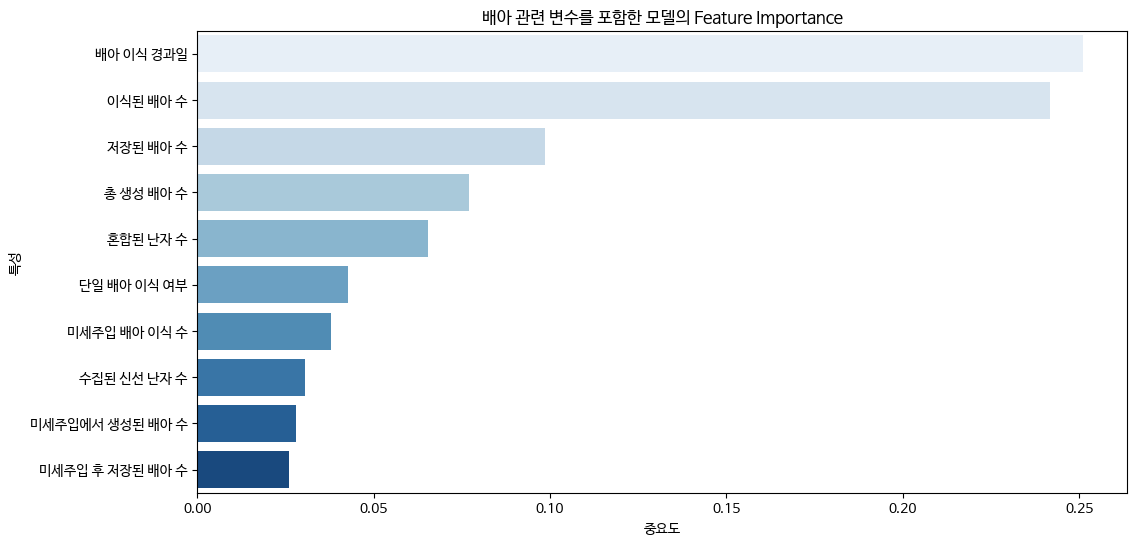

<ipython-input-35-82a15e348f80>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_without.values[:10], y=feature_importance_without.index[:10], palette="Reds")


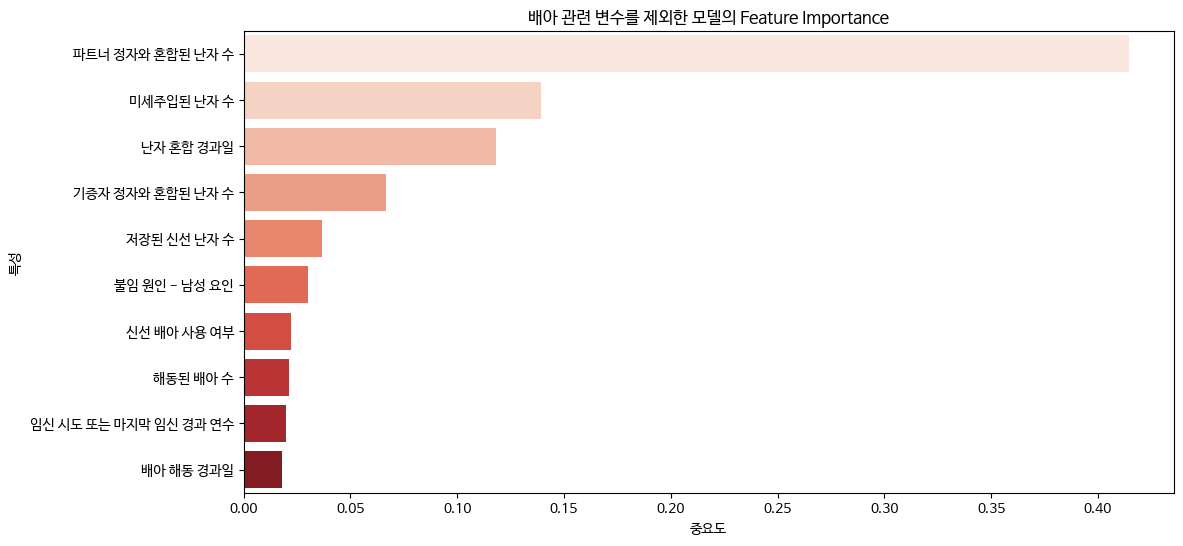

In [ ]:
# Feature Importance Ï∂îÏ∂ú
feature_importance_with = pd.Series(rf_with.feature_importances_, index=X_with_embryo.columns).sort_values(ascending=False)
feature_importance_without = pd.Series(rf_without.feature_importances_, index=X_without_embryo.columns).sort_values(ascending=False)

# Feature Importance ÎπÑÍµê ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_with.values[:10], y=feature_importance_with.index[:10], palette="Blues")
plt.title("Î∞∞ÏïÑ Í¥ÄÎ†® Î≥ÄÏàòÎ•º Ìè¨Ìï®Ìïú Î™®Îç∏Ïùò Feature Importance")
plt.xlabel("Ï§ëÏöîÎèÑ")
plt.ylabel("ÌäπÏÑ±")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_without.values[:10], y=feature_importance_without.index[:10], palette="Reds")
plt.title("Î∞∞ÏïÑ Í¥ÄÎ†® Î≥ÄÏàòÎ•º Ï†úÏô∏Ìïú Î™®Îç∏Ïùò Feature Importance")
plt.xlabel("Ï§ëÏöîÎèÑ")
plt.ylabel("ÌäπÏÑ±")
plt.show()



‚úÖ `train_DI` Îç∞Ïù¥ÌÑ∞Ïùò Random Forest Î™®Îç∏ Ï†ïÌôïÎèÑ: 0.8697


<ipython-input-36-479b15861984>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_DI.values[:10], y=feature_importance_DI.index[:10], palette="Oranges")


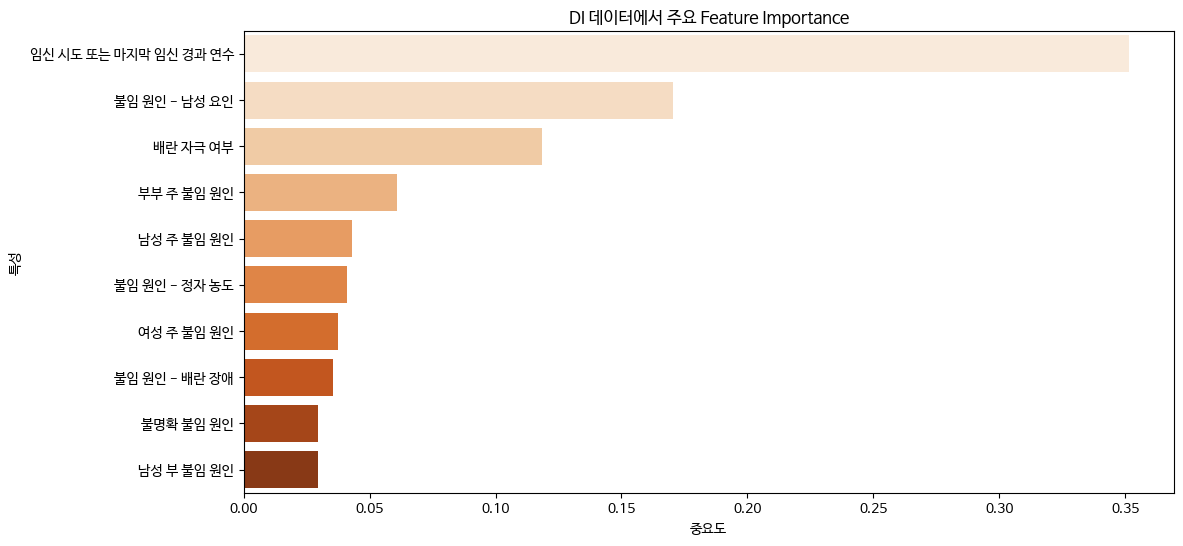

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# DI Îç∞Ïù¥ÌÑ∞ÏÖã ÏÇ¨Ïö©
data_DI = train_DI.copy()

# Î™©Ìëú Î≥ÄÏàò (ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä)
target_column = "ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä"

# ÏàòÏπòÌòï Î≥ÄÏàòÎßå ÏÑ†ÌÉù
X_DI = data_DI.drop(columns=[target_column]).select_dtypes(include=[np.number])
y_DI = data_DI[target_column]

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train_DI, X_test_DI, y_train_DI, y_test_DI = train_test_split(X_DI, y_DI, test_size=0.2, random_state=42, stratify=y_DI)

# Random Forest Î™®Îç∏ ÌïôÏäµ
rf_DI = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_DI.fit(X_train_DI, y_train_DI)

# Î™®Îç∏ ÏòàÏ∏° Î∞è Ï†ïÌôïÎèÑ ÌèâÍ∞Ä
y_pred_DI = rf_DI.predict(X_test_DI)
accuracy_DI = accuracy_score(y_test_DI, y_pred_DI)

print(f"\n‚úÖ `train_DI` Îç∞Ïù¥ÌÑ∞Ïùò Random Forest Î™®Îç∏ Ï†ïÌôïÎèÑ: {accuracy_DI:.4f}")

# Feature Importance Ï∂îÏ∂ú
feature_importance_DI = pd.Series(rf_DI.feature_importances_, index=X_DI.columns).sort_values(ascending=False)

# Feature Importance ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_DI.values[:10], y=feature_importance_DI.index[:10], palette="Oranges")
plt.title("DI Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ï£ºÏöî Feature Importance")
plt.xlabel("Ï§ëÏöîÎèÑ")
plt.ylabel("ÌäπÏÑ±")
plt.show()


1 DI ÏûÑÏã† ÌöüÏàò, Ï¥ù ÏûÑÏã† ÌöüÏàò, IVF ÏûÑÏã† ÌöüÏàò Îì±Ïùò Î≥ÄÏàòÎì§ÏùÄ ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂ÄÎ•º ÏòàÏ∏°ÌïòÎäî Îç∞ Îß§Ïö∞ Ï§ëÏöîÌïú Î≥ÄÏàòÏùº Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùå
2 ÎÇòÏù¥, ÌäπÏ†ï ÏãúÏà† Ïú†Ìòï, Ï∂úÏÇ∞ ÌöüÏàò Îì±ÎèÑ ÏûÑÏã† ÏÑ±Í≥µÎ•†Í≥º Î∞ÄÏ†ëÌïú Í¥ÄÎ†®Ïù¥ ÏûàÏùå
3 Î∞∞ÎûÄ Í¥ÄÎ†® Î≥ÄÏàòÎì§ÏùÄ ÏòÅÌñ•Î†•Ïù¥ Ï†ÅÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùå ->
**ÌïòÏßÄÎßå FEATURE IMPORTANCE Î∂ÑÏÑù Í≤∞Í≥ºÏóêÏÑúÎäî Î∞∞ÎûÄ Í¥ÄÎ†® Î≥ÄÏàòÍ∞Ä Îçî Ï§ëÏöî**
- Î∞∞ÏïÑ Í¥ÄÎ†® Î≥ÄÏàòÎäî ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä ÏòàÏ∏°ÌïòÎäîÎç∞ ÏûàÏñ¥ÏÑú ÌïÑÏàòÏ†ÅÏù∏ ÏöîÏÜåÎ°ú Î≥¥Ïù∏Îã§. (IVFÏóêÏÑúÎäî Î∞òÎìúÏãú Ìè¨Ìï®)
- Î∞∞ÏïÑ Î≥ÄÏàòÎ•º Ï†úÏô∏ÌïòÎ©¥ ÎÇúÏûê Í¥ÄÎ†® Î≥ÄÏàòÍ∞Ä Ï§ëÏöî Î≥ÄÏàòÎ°ú Îì±Ïû•ÌïòÏßÄÎßå, Î∞∞ÏïÑ Î≥ÄÏàòÎßåÌÅº Í∞ïÌïú ÏòÅÌñ•Î†•ÏùÑ Í∞ÄÏßÄÏßÄÎäî ÏïäÏùå


- DIÏãúÏà†ÏóêÏÑú Í∞ÄÏû• Ï§ëÏöîÌïú Î≥ÄÏàòÎäî 'ÏûÑÏã† ÏãúÎèÑ ÎòêÎäî ÎßàÏßÄÎßâ ÏûÑÏã† Í≤ΩÍ≥º ÏùºÏàò'
- Î∂àÏûÑ ÏõêÏù∏Ïù¥ ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä Í≤∞Ï†ïÌïòÎäî ÌïµÏã¨ ÏöîÏÜå


IVFÏóêÏÑúÎäî Î∞∞ÏïÑ ÏÉÅÌÉúÍ∞Ä ÌïµÏã¨Ïù¥ÏóàÏßÄÎßå, DIÏóêÏÑúÎäî Î∂àÏûÑ ÏõêÏù∏Í≥º ÏãúÏà† Ï†Ñ ÏûÑÏã† ÏãúÎèÑ Í∏∞Í∞ÑÏù¥ Îçî Ï§ëÏöîÌïòÍ≤å ÏûëÏö©


üîπ train_IVF Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù ÏãúÏûë...

‚úÖ train_IVF Î™®Îç∏ Ï†ïÌôïÎèÑ: 0.7388
              precision    recall  f1-score   support

           0       0.74      1.00      0.85     36929
           1       0.58      0.01      0.01     13083

    accuracy                           0.74     50012
   macro avg       0.66      0.50      0.43     50012
weighted avg       0.70      0.74      0.63     50012



<ipython-input-38-71f74d26ac33>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values[:10], y=feature_importance.index[:10], palette="coolwarm")


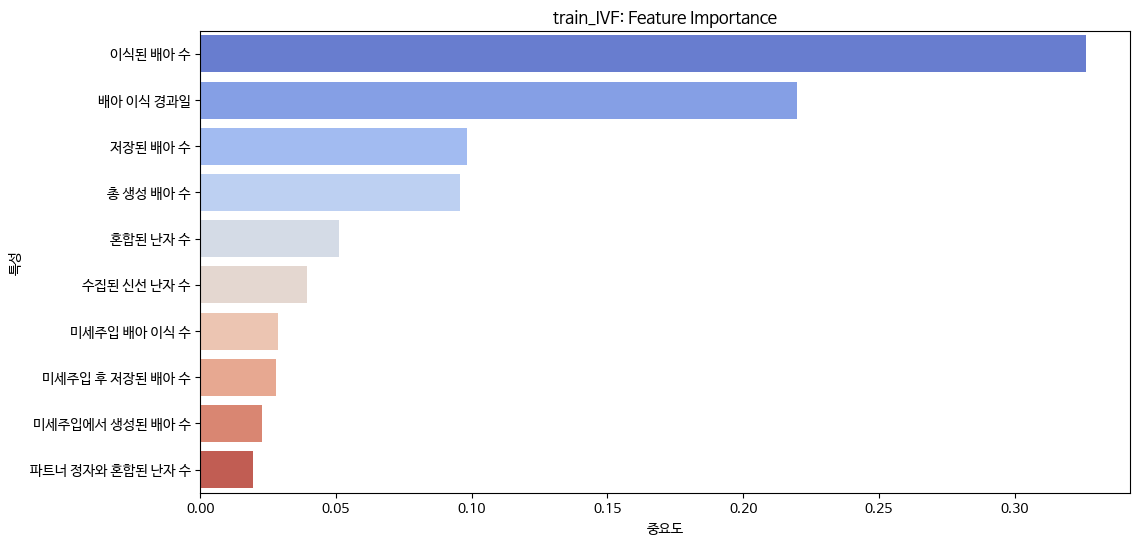


üîπ train_DI Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù ÏãúÏûë...

‚úÖ train_DI Î™®Îç∏ Ï†ïÌôïÎèÑ: 0.8705
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1097
           1       0.00      0.00      0.00       162

    accuracy                           0.87      1259
   macro avg       0.44      0.50      0.47      1259
weighted avg       0.76      0.87      0.81      1259



<ipython-input-38-71f74d26ac33>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values[:10], y=feature_importance.index[:10], palette="coolwarm")


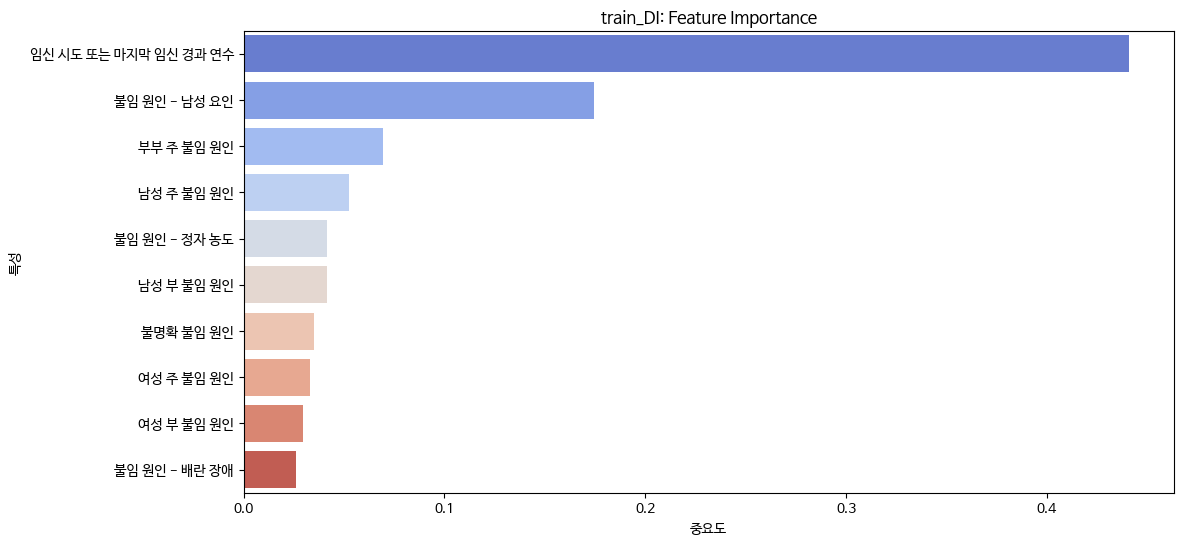

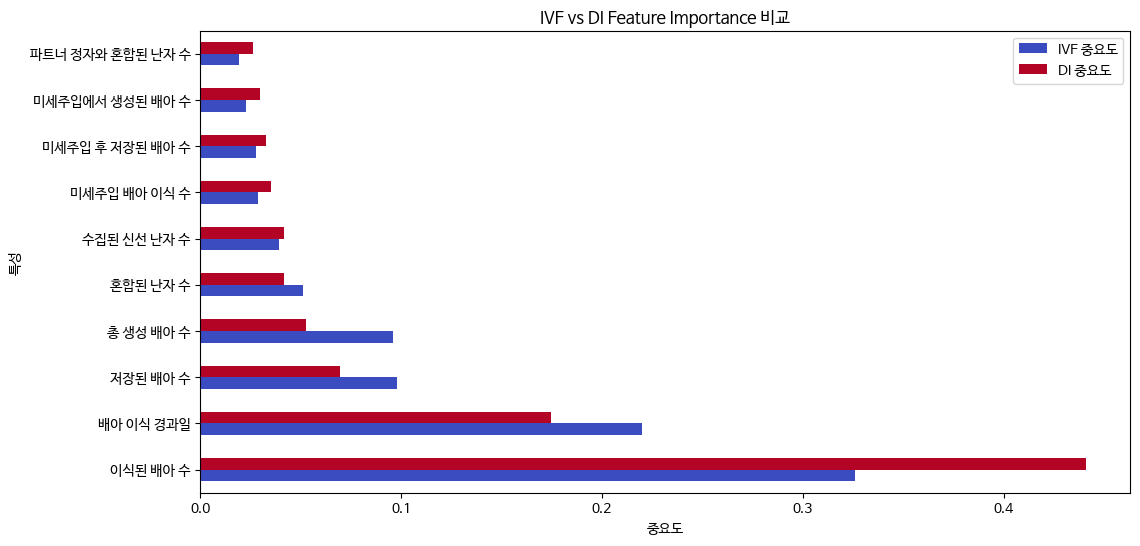

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# üîπ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò (Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨, ÌòïÎ≥ÄÌôò)
def preprocess_data(data):
    """Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ (Ïà´ÏûêÌòï Î≥ÄÌôò, Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨)"""

    # Ïà´ÏûêÎ°ú Î≥ÄÌôòÌï† Ïàò ÏûàÎäî Ïó¥ Î¶¨Ïä§Ìä∏
    numeric_cols = [
        "Ï¥ù ÏãúÏà† ÌöüÏàò", "ÌÅ¥Î¶¨Îãâ ÎÇ¥ Ï¥ù ÏãúÏà† ÌöüÏàò", "IVF ÏãúÏà† ÌöüÏàò", "DI ÏãúÏà† ÌöüÏàò",
        "Ï¥ù ÏûÑÏã† ÌöüÏàò", "IVF ÏûÑÏã† ÌöüÏàò", "DI ÏûÑÏã† ÌöüÏàò", "Ï¥ù Ï∂úÏÇ∞ ÌöüÏàò",
        "IVF Ï∂úÏÇ∞ ÌöüÏàò", "DI Ï∂úÏÇ∞ ÌöüÏàò", "ÏãúÏà† ÎãπÏãú ÎÇòÏù¥", "ÏûÑÏã† ÏãúÎèÑ ÎòêÎäî ÎßàÏßÄÎßâ ÏûÑÏã† Í≤ΩÍ≥º Ïó∞Ïàò"
    ]

    for col in numeric_cols:
        data[col] = pd.to_numeric(data[col], errors='coerce')

    # Ïπ¥ÌÖåÍ≥†Î¶¨Ìòï Îç∞Ïù¥ÌÑ∞Î•º Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò
    categorical_cols = [
        "ÏãúÏà† ÏãúÍ∏∞ ÏΩîÎìú", "ÏãúÏà† Ïú†Ìòï", "ÌäπÏ†ï ÏãúÏà† Ïú†Ìòï", "Î∞∞ÎûÄ ÏûêÍ∑π Ïó¨Î∂Ä", "Î∞∞ÎûÄ Ïú†ÎèÑ Ïú†Ìòï",
        "Îã®Ïùº Î∞∞ÏïÑ Ïù¥Ïãù Ïó¨Î∂Ä", "Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ Í≤ÄÏÇ¨ ÏÇ¨Ïö© Ïó¨Î∂Ä", "Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ ÏßÑÎã® ÏÇ¨Ïö© Ïó¨Î∂Ä", "Î∞∞ÏïÑ ÏÉùÏÑ± Ï£ºÏöî Ïù¥Ïú†"
    ]

    for col in categorical_cols:
        data[col] = data[col].astype(str)

    return data

# üîπ Feature Importance Î∂ÑÏÑù Ìï®Ïàò (RandomForest ÏÇ¨Ïö©)
def feature_importance_analysis(data, dataset_name):
    """Random ForestÎ•º Ïù¥Ïö©Ìïú Feature Importance Î∂ÑÏÑù"""

    target_column = "ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä"

    X = data.drop(columns=[target_column]).select_dtypes(include=[np.number])
    y = data[target_column]

    # Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Î™®Îç∏ ÌïôÏäµ
    rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
    rf_model.fit(X_train, y_train)

    # ÏòàÏ∏° Î∞è ÏÑ±Îä• ÌèâÍ∞Ä
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"\n‚úÖ {dataset_name} Î™®Îç∏ Ï†ïÌôïÎèÑ: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

    # Feature Importance Ï∂îÏ∂ú
    feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

    # Feature Importance ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12, 6))
    sns.barplot(x=feature_importance.values[:10], y=feature_importance.index[:10], palette="coolwarm")
    plt.title(f"{dataset_name}: Feature Importance")
    plt.xlabel("Ï§ëÏöîÎèÑ")
    plt.ylabel("ÌäπÏÑ±")
    plt.show()

    return feature_importance  # üìå Feature Importance Î∞òÌôò Ï∂îÍ∞Ä

# üîπ IVF vs DI Îç∞Ïù¥ÌÑ∞ ÎπÑÍµê ÏãúÍ∞ÅÌôî
def compare_ivf_di_feature_importance(ivf_importance, di_importance):
    """IVFÏôÄ DI Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ï§ëÏöî Î≥ÄÏàòÎ•º ÎπÑÍµê"""

    comparison_df = pd.DataFrame({
        "IVF Ï§ëÏöîÎèÑ": ivf_importance[:10].values,
        "DI Ï§ëÏöîÎèÑ": di_importance[:10].values
    }, index=ivf_importance[:10].index)

    comparison_df.plot(kind="barh", figsize=(12, 6), colormap="coolwarm")
    plt.title("IVF vs DI Feature Importance ÎπÑÍµê")
    plt.xlabel("Ï§ëÏöîÎèÑ")
    plt.ylabel("ÌäπÏÑ±")
    plt.show()

# üîπ Îç∞Ïù¥ÌÑ∞ÏÖã Î∂àÎü¨Ïò§Í∏∞
train_IVF = pd.read_csv("train_IVF.csv")
train_DI = pd.read_csv("train_DI.csv")

datasets = {
    "train_IVF": train_IVF,
    "train_DI": train_DI,
}

# üîπ Ï†ÑÏ≤¥ Î∂ÑÏÑù Ïã§Ìñâ
feature_importances = {}

for dataset_name, data in datasets.items():
    print(f"\nüîπ {dataset_name} Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù ÏãúÏûë...")

    # Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
    data = preprocess_data(data)

    # Feature Importance Î∂ÑÏÑù ÏàòÌñâ ÌõÑ Ï†ÄÏû•
    feature_importances[dataset_name] = feature_importance_analysis(data, dataset_name)  # üìå Î∞òÌôòÍ∞í Ï†ÄÏû•

# üîπ IVFÏôÄ DI Îç∞Ïù¥ÌÑ∞Ïùò Feature Importance ÎπÑÍµê
compare_ivf_di_feature_importance(feature_importances["train_IVF"], feature_importances["train_DI"])


In [ ]:
ivf_selected_columns = [
    "Ïù¥ÏãùÎêú Î∞∞ÏïÑ Ïàò", "Î∞∞ÏïÑ Ïù¥Ïãù Í≤ΩÍ≥ºÏùº", "Ï†ÄÏû•Îêú Î∞∞ÏïÑ Ïàò", "Ï¥ù ÏÉùÏÑ± Î∞∞ÏïÑ Ïàò",
    "ÌòºÌï©Îêú ÎÇúÏûê Ïàò", "Îã®Ïùº Î∞∞ÏïÑ Ïù¥Ïãù Ïó¨Î∂Ä", "ÎØ∏ÏÑ∏Ï£ºÏûÖ Î∞∞ÏïÑ Ïù¥Ïãù Ïàò",
    "ÎØ∏ÏÑ∏Ï£ºÏûÖ ÌõÑ Ï†ÄÏû•Îêú Î∞∞ÏïÑ Ïàò", "ÏàòÏßëÎêú Ïã†ÏÑ† ÎÇúÏûê Ïàò", "ÎØ∏ÏÑ∏Ï£ºÏûÖÏóêÏÑú ÏÉùÏÑ±Îêú Î∞∞ÏïÑ Ïàò",
    "ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä"
]
di_selected_columns = [
    "ÏûÑÏã† ÏãúÎèÑ ÎòêÎäî ÎßàÏßÄÎßâ ÏûÑÏã† Í≤ΩÍ≥º Ïó∞Ïàò", "Î∂àÏûÑ ÏõêÏù∏ - ÎÇ®ÏÑ± ÏöîÏù∏", "Î∞∞ÎûÄ ÏûêÍ∑π Ïó¨Î∂Ä",
    "Î∂ÄÎ∂Ä Ï£º Î∂àÏûÑ ÏõêÏù∏", "ÎÇ®ÏÑ± Ï£º Î∂àÏûÑ ÏõêÏù∏", "Î∂àÏûÑ ÏõêÏù∏ - Ï†ïÏûê ÎÜçÎèÑ",
    "Ïó¨ÏÑ± Ï£º Î∂àÏûÑ ÏõêÏù∏", "Î∂àÏûÑ ÏõêÏù∏ - Î∞∞ÎûÄ Ïû•Ïï†", "Î∂àÎ™ÖÌôï Î∂àÏûÑ ÏõêÏù∏",
    "ÎÇ®ÏÑ± Î∂Ä Î∂àÏûÑ ÏõêÏù∏", "ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä"
]


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


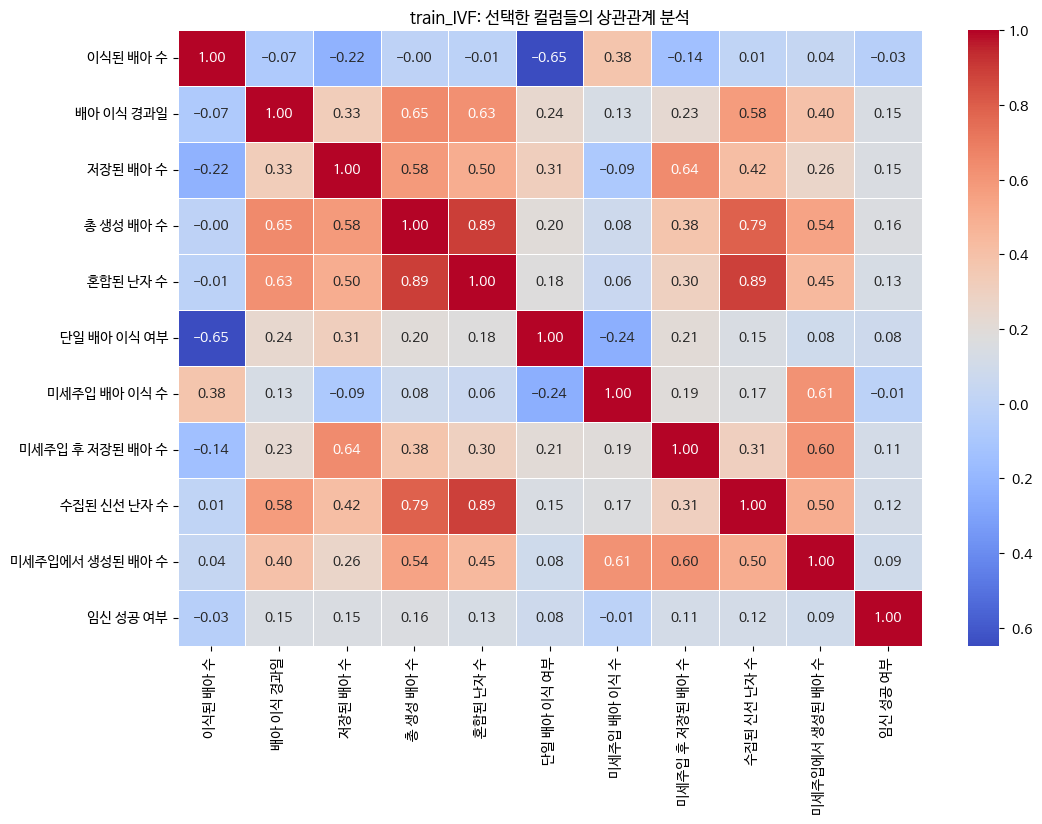

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


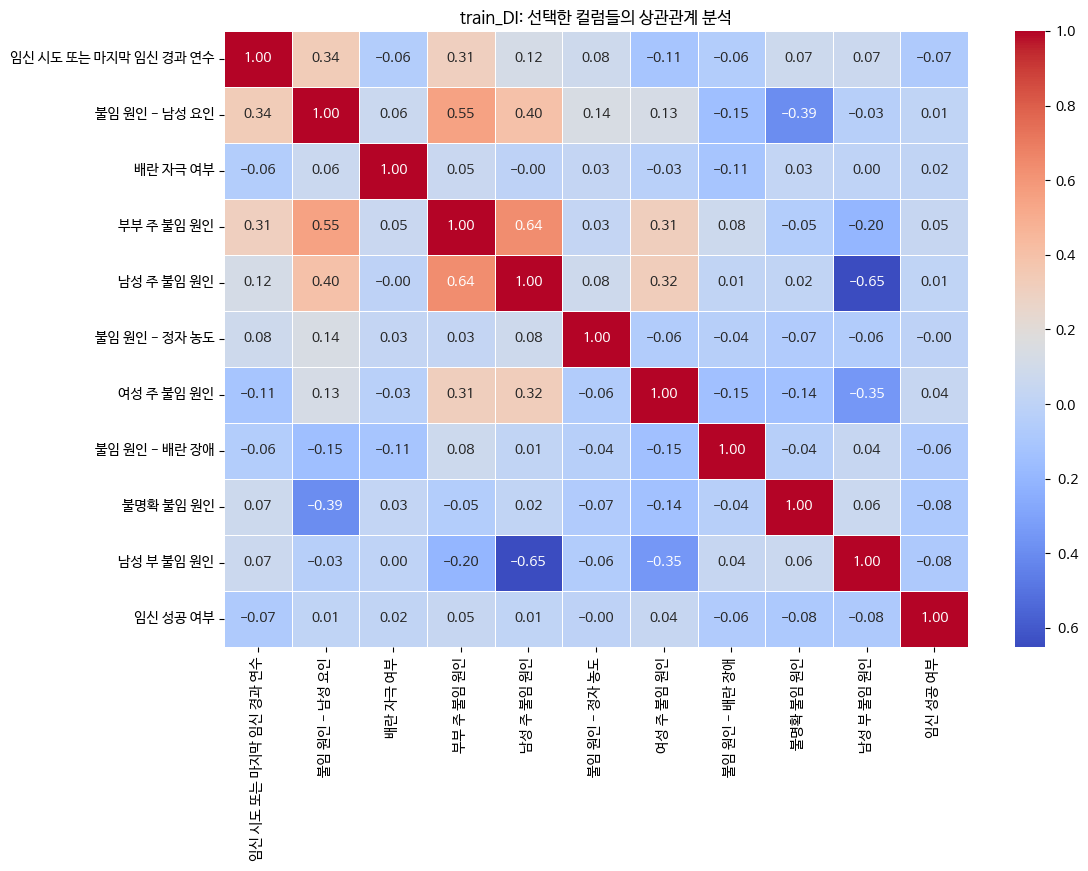

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# üîπ IVF Î∞è DI Îç∞Ïù¥ÌÑ∞Ïùò ÌäπÏ†ï Ïª¨ÎüºÎßåÏùÑ Ïù¥Ïö©Ìïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù Ìï®Ïàò
def custom_correlation_analysis(data, dataset_name, selected_columns):
    """ÌäπÏ†ï Ïª¨ÎüºÎßåÏùÑ Ïù¥Ïö©ÌïòÏó¨ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù"""

    # ÏÑ†ÌÉùÌïú Ïª¨ÎüºÎßå ÌïÑÌÑ∞ÎßÅ
    selected_data = data[selected_columns].dropna()

    # ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌñâÎ†¨ Í≥ÑÏÇ∞
    correlation_matrix = selected_data.corr()

    # ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Heatmap ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(f"{dataset_name}: ÏÑ†ÌÉùÌïú Ïª¨ÎüºÎì§Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù")
    plt.show()

# üîπ Îç∞Ïù¥ÌÑ∞ÏÖã Î∂àÎü¨Ïò§Í∏∞
train_IVF = pd.read_csv("train_IVF.csv")  # IVF Îç∞Ïù¥ÌÑ∞
train_DI = pd.read_csv("train_DI.csv")    # DI Îç∞Ïù¥ÌÑ∞

# üîπ IVF Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏßÄÏ†ïÌïú Ïª¨ÎüºÎì§Î°ú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù Ïã§Ìñâ
custom_correlation_analysis(train_IVF, "train_IVF", [
    "Ïù¥ÏãùÎêú Î∞∞ÏïÑ Ïàò", "Î∞∞ÏïÑ Ïù¥Ïãù Í≤ΩÍ≥ºÏùº", "Ï†ÄÏû•Îêú Î∞∞ÏïÑ Ïàò", "Ï¥ù ÏÉùÏÑ± Î∞∞ÏïÑ Ïàò",
    "ÌòºÌï©Îêú ÎÇúÏûê Ïàò", "Îã®Ïùº Î∞∞ÏïÑ Ïù¥Ïãù Ïó¨Î∂Ä", "ÎØ∏ÏÑ∏Ï£ºÏûÖ Î∞∞ÏïÑ Ïù¥Ïãù Ïàò",
    "ÎØ∏ÏÑ∏Ï£ºÏûÖ ÌõÑ Ï†ÄÏû•Îêú Î∞∞ÏïÑ Ïàò", "ÏàòÏßëÎêú Ïã†ÏÑ† ÎÇúÏûê Ïàò", "ÎØ∏ÏÑ∏Ï£ºÏûÖÏóêÏÑú ÏÉùÏÑ±Îêú Î∞∞ÏïÑ Ïàò",
    "ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä"
])

# üîπ DI Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏßÄÏ†ïÌïú Ïª¨ÎüºÎì§Î°ú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù Ïã§Ìñâ
custom_correlation_analysis(train_DI, "train_DI", [
    "ÏûÑÏã† ÏãúÎèÑ ÎòêÎäî ÎßàÏßÄÎßâ ÏûÑÏã† Í≤ΩÍ≥º Ïó∞Ïàò", "Î∂àÏûÑ ÏõêÏù∏ - ÎÇ®ÏÑ± ÏöîÏù∏", "Î∞∞ÎûÄ ÏûêÍ∑π Ïó¨Î∂Ä",
    "Î∂ÄÎ∂Ä Ï£º Î∂àÏûÑ ÏõêÏù∏", "ÎÇ®ÏÑ± Ï£º Î∂àÏûÑ ÏõêÏù∏", "Î∂àÏûÑ ÏõêÏù∏ - Ï†ïÏûê ÎÜçÎèÑ",
    "Ïó¨ÏÑ± Ï£º Î∂àÏûÑ ÏõêÏù∏", "Î∂àÏûÑ ÏõêÏù∏ - Î∞∞ÎûÄ Ïû•Ïï†", "Î∂àÎ™ÖÌôï Î∂àÏûÑ ÏõêÏù∏",
    "ÎÇ®ÏÑ± Î∂Ä Î∂àÏûÑ ÏõêÏù∏", "ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä"
])


- IVFÏóêÏÑúÎäî Î∞∞ÏïÑ Í¥ÄÎ†® Î≥ÄÏàòÍ∞Ä Í∞ÄÏû• Ï§ëÏöîÌïòÎ©∞, Î∞∞ÏïÑ Ïù¥Ïãù ÌöüÏàòÏôÄ Î≥¥Ï°¥ ÏÉÅÌÉúÍ∞Ä ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂ÄÏóê ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ®
- DIÏóêÏÑúÎäî Î∂àÏûÑ ÏõêÏù∏ Î∞è Î∞∞ÎûÄ ÏûêÍ∑π Ïó¨Î∂ÄÍ∞Ä ÌïµÏã¨ Î≥ÄÏàòÎ°ú, Í∏∞Ï°¥ ÏûÑÏã† ÏãúÎèÑ Í∏∞Í∞ÑÏù¥ ÏÑ±Í≥µ Ïó¨Î∂ÄÎ•º Í≤∞Ï†ïÌïòÎäî Ï§ëÏöîÌïú ÏöîÏù∏ÏûÑ